# Projeto Pulmão
Descrição: O dataset contém imagens de TAC toráx divididas em três categorias: Benigno (Benign), Maligno (Malignant) e Normal (Normal). Este dataset é útil para classificação de imagens médicas diferenciando pulmões saúdaveis de pulmões com presença de massas benignas ou malignas.

Objectivo: Criar uma CNN que consiga detectar massas potencialmente malignas de forma a poder encaminhar os utentes para uma linha de diagnóstico e tratamento o mais atempado possível.


Este é um problema de classificação multitarget (3 target's)


Este projeto terá a seguinte estrutura: 

    0. Importar bibliotecas instaladas
    1. Carregamento e preparação dos dados
    2. Análise exploratória dos dados carregados
    3. Divisão dados treino e teste
    4. Definição de modelos
        4. 1. Modelo 0
            4. 1. 1. Modelo 0_1
            4. 1. 2. Modelo 0_2
    5. Resumo de resultados
    6. Modelo escolhido
        6. 1. Previsões no conjunto de dados para o modelo escolhido
        6. 2. Visualização LIME
            6. 2. 1. Normal
            6. 2. 2. Benigno
            6. 2. 3. Maligno
    7. Anexo - Modelos usando tecnicas de regularização de overfitting
        7. 1. Modelo 1
            7. 1. 1. Regularizar L2 = 0.001
        7. . Modelo 2
            7. 2. 1. Earlystoping (Modelo 0 -> Patience =2)



# 0. Importar bilbiotecas instaladas

In [1]:
import os

#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install setuptools
#!pip install keras tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import io
from lime import lime_image
from skimage.color import rgb2gray
from skimage.segmentation import slic
from skimage.color import label2rgb
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Configuração para que os gráficos sejam exibidos diretamente no notebook
%matplotlib inline



c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Carregamento e preparação dos dados

In [2]:
# Função para carregar as imagens e etiquetas
def load_images(data_dir):
    categories = ['Normal', 'Benign', 'Malignant']
    images = []
    labels = []
    label_dict = {category: idx for idx, category in enumerate(categories)} #'Normal' é rotulada como 0,
    #'Benign' é rotulada como 1,'Malignant' é rotulada como 2]
 

    
    for category in categories:
        class_dir = os.path.join(data_dir, category)
        print(f"Verificar a pasta: {class_dir}")  # Mensagem de depuração
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    image = Image.open(image_path).convert('RGB')  # Garantir que a imagem é RGB
                    image = image.resize((256, 256))  # Redimensionar para 256x256 pixels
                    image = np.array(image)
                    print(image.shape)
                    if image.shape == (256, 256, 3):  # Certificar que a imagem tem a dimensão correta
                                                        #3 RGB
                        images.append(image)
                        labels.append(label_dict[category])
                    else:
                        print(f"Dimensão incorreta para a imagem {image_path}: {image.shape}")
                except Exception as e:
                    print(f"Erro ao carregar a imagem {image_path}: {e}")  # Mensagem de depuração
                    continue
        else:
            print(f"Pasta não encontrada: {class_dir}")  # Mensagem de depuração
    return np.array(images), np.array(labels)


In [3]:
# Caminho para a pasta das imagens
data_dir = r'C:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 4º Trimestre\Deep Learning\Pulmoes' #alterar path adequado

# Carregar as imagens e etiquetas
X, y = load_images(data_dir)


Verificar a pasta: C:\Users\raque\OneDrive\Desktop\PG HDS\Aulas - 4º Trimestre\Deep Learning\Pulmoes\Normal
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256,

# 2. Análise exploratória dos dados carregados

In [4]:
# Validar imagens carregadas 
X


array([[[[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        ...,

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]],

        [[38, 38, 38],
         [38, 38, 38],
         [38, 38, 38],
         ...,
         [38, 38, 38],
         [38, 38, 38],
         [38, 38, 38]]],


       [[[38, 38, 38],
         [38, 38, 38],
         [38, 

In [5]:
# Verificar a distribuição das categorias
unique_categories, counts = np.unique(y, return_counts=True)
categories = ['Normal', 'Benign', 'Malignant']
dict_cat={}
for category, count in zip(unique_categories, counts):
    dict_cat[categories[category]]=count
    print(f"Categoria: {categories[category]}, Número de imagens: {count}")

Categoria: Normal, Número de imagens: 153
Categoria: Benign, Número de imagens: 120
Categoria: Malignant, Número de imagens: 199


In [6]:
# Imprime o total de imagens e as dimensões dos arrays
total_images = sum(dict_cat.values())
print(f"Total de imagens carregadas: {total_images}")



Total de imagens carregadas: 472


# 3. Divisão dados treino e teste

In [7]:
# Dividir os dados em treino, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #testar 30% dos dados carregados

In [8]:
y_train

array([1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2,
       1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1,

In [9]:
X_train

array([[[[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]],

        [[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]],

        [[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]],

        ...,

        [[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]],

        [[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]],

        [[37, 37, 37],
         [37, 37, 37],
         [37, 37, 37],
         ...,
         [37, 37, 37],
         [37, 37, 37],
         [37, 37, 37]]],


       [[[38, 38, 38],
         [38, 38, 38],
         [38, 

In [10]:
# Verificar dimensão de dados carregados treino e teste
print(len(X_train))
print(len(X_test))


330
142


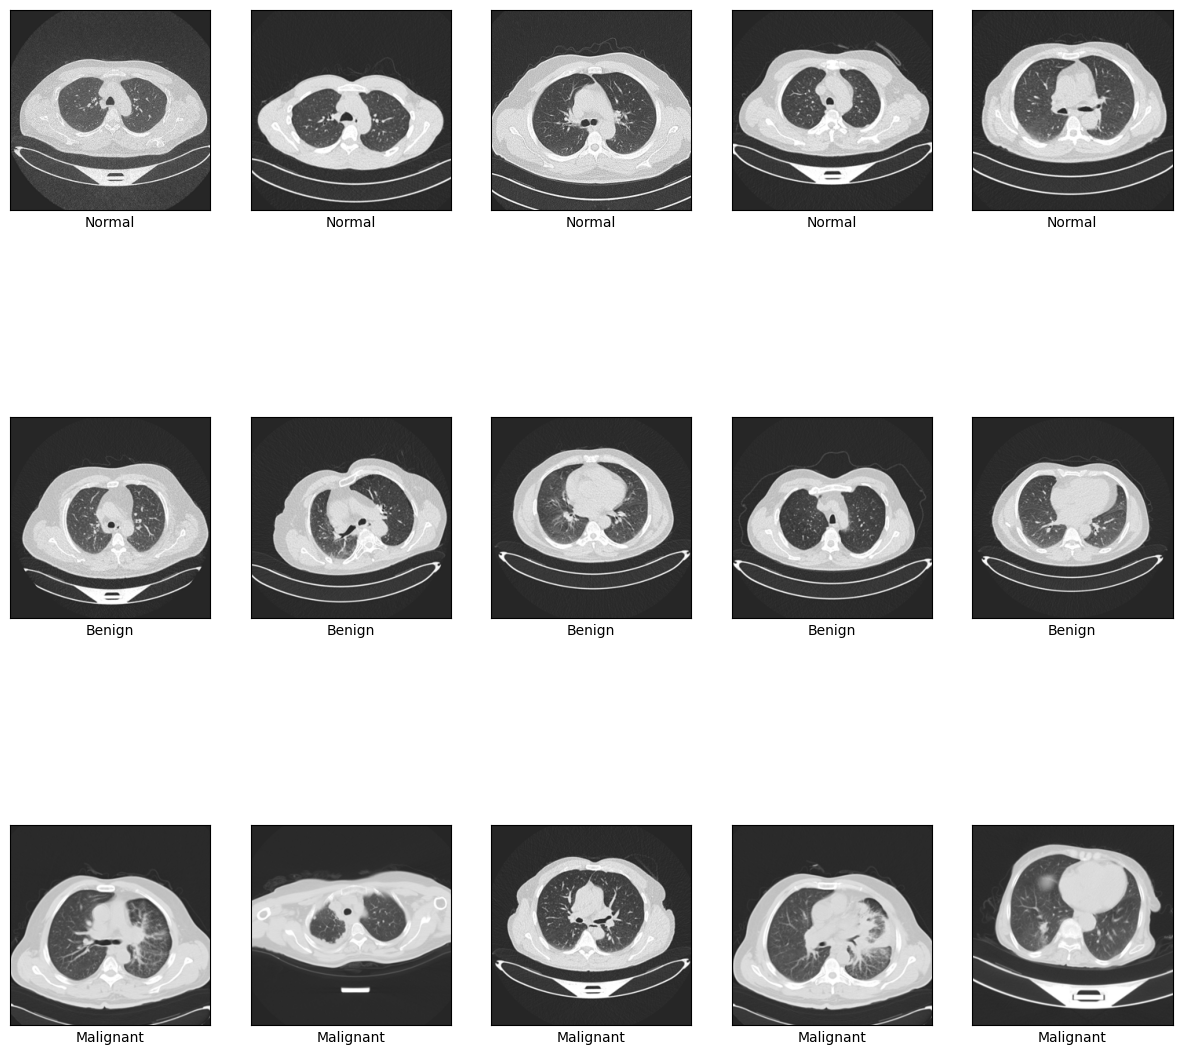

In [11]:


def show_sample_images(images, labels, categories, num_samples_per_category=5):
    plt.figure(figsize=(15, 5 * len(categories)))  # Ajusta o tamanho da figura

    for idx, category in enumerate(categories):
        # Obter os índices das imagens da categoria atual
        category_indices = np.where(labels == idx)[0]
        
        # Se houver menos imagens que o número solicitado, ajusta o número de amostras
        if len(category_indices) < num_samples_per_category:
            sample_indices = category_indices
        else:
            # Selecionar aleatoriamente as imagens dessa categoria
            sample_indices = np.random.choice(category_indices, num_samples_per_category, replace=False)
        
        for i, sample_index in enumerate(sample_indices):
            plt.subplot(len(categories), num_samples_per_category, idx * num_samples_per_category + i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[sample_index])
            plt.xlabel(category)
    
    plt.show()

# Definir categorias
categories = ['Normal', 'Benign', 'Malignant']

# Mostrar uma amostra de 5 imagens de cada categoria do X_test
show_sample_images(X_test, y_test, categories, num_samples_per_category=5)

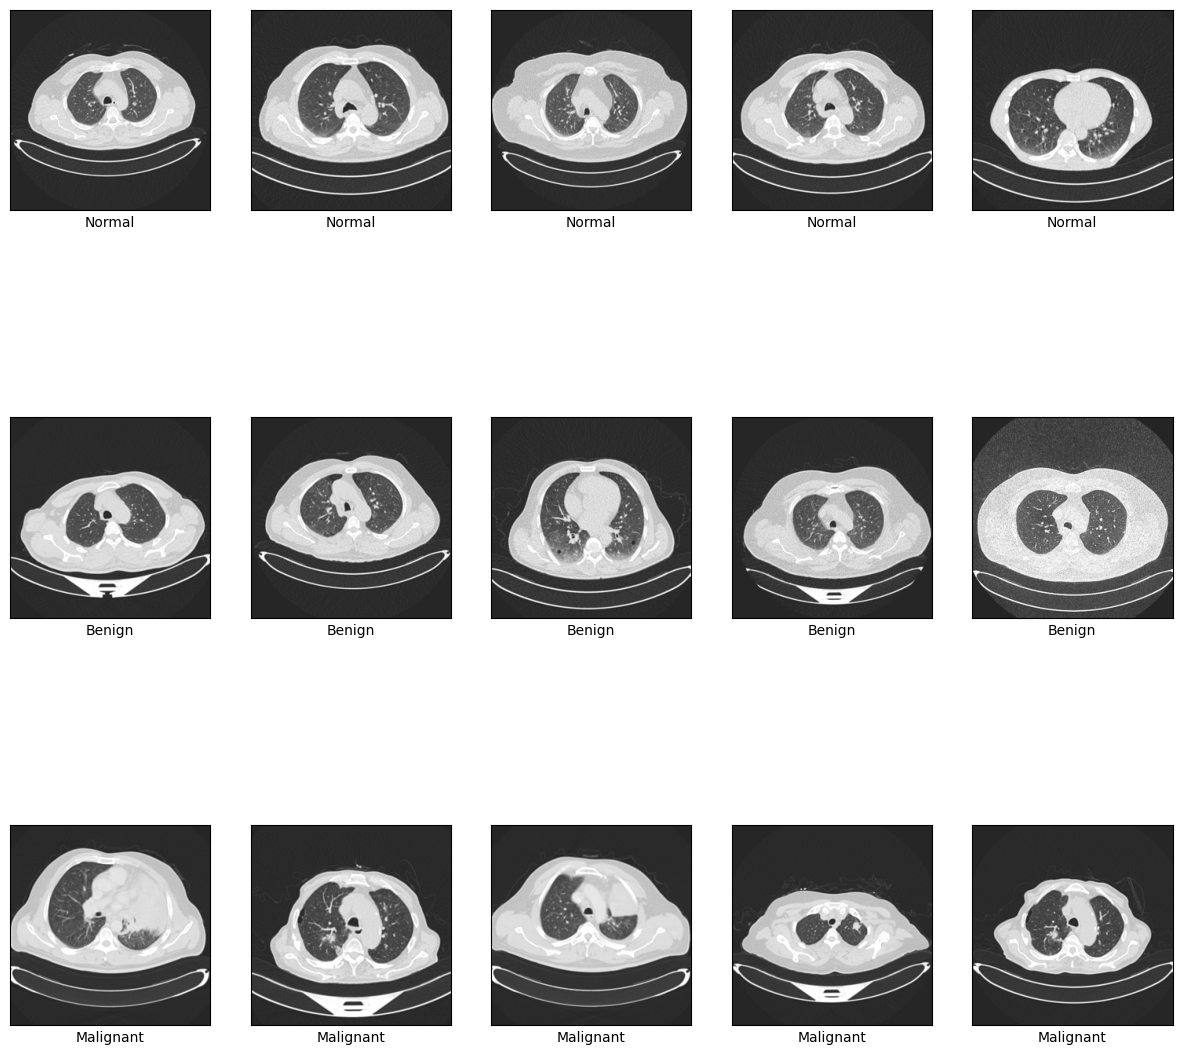

In [12]:
# Mostrar uma amostra de 5 imagens de cada categoria do X_train
show_sample_images(X_train, y_train, categories, num_samples_per_category=5)

In [13]:
# Contar as categorias diferentes em y_train
unique_categories, counts = np.unique(y_train, return_counts=True)

# Definir categorias
categories = ['Normal', 'Benign', 'Malignant']

# Mostrar as categorias e o número de imagens em cada uma
for category, count in zip(unique_categories, counts):
    print(f"Categoria: {categories[category]}, Número de imagens: {count}")

Categoria: Normal, Número de imagens: 107
Categoria: Benign, Número de imagens: 84
Categoria: Malignant, Número de imagens: 139


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y.shape)


(330, 256, 256, 3)
(142, 256, 256, 3)
(472,)


In [15]:
# Normalizar os dados

x_train=X_train/255
x_test=X_test/255

In [16]:
#One hot enconding

# Converter as labels para inteiros
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Codificar as labels para one-hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# 4. Definir o modelo e compilar

In [17]:
Dados_Modelos = {} #Dicionário usado para imprimir o resumo de resultados, este tinnha o objectivo de agregar todos os modelos num unico output

## 4.1. Modelo 0

In [18]:
# Definir o modelo CNN


# Adicionar descrição do Modelo
modelo0_l = ['Modelo 0 - Modelo sem qualquer optimização']

model_cnn0 = Sequential([
   Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)), # 1ª camada de convolução kernel= 3*3 
    MaxPooling2D(2, 2), #AveragePooling2D(2,2) #SumPooling2D(2,2) 

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),# Achatamento dos nossos mapas de caracteristicas

    Dense(1024, activation='relu'), 
    
    Dense(3, activation='softmax')
])

# Compilar o modelo
model_cnn0.compile(optimizer='adam',
                  loss='crossentropy',
                  metrics=['accuracy'])

# Exibir o resumo do modelo
summary = model_cnn0.summary()
# Adicionar Modelo antes do treino e o seu summary
modelo0_l = modelo0_l + [model_cnn0, summary]
summary

c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,969,379 (480.54 MB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history0 = model_cnn0.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Avalie o modelo usando os dados de teste
loss, accuracy = model_cnn0.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Adicionar Modelo pos treino, seu history e test accuracy
modelo0_l = modelo0_l + [model_cnn0, history0, accuracy]


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4144 - loss: 8.1977 - val_accuracy: 0.8521 - val_loss: 0.4221
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9510 - loss: 0.2305 - val_accuracy: 0.9859 - val_loss: 0.1078
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9972 - loss: 0.0257 - val_accuracy: 0.9789 - val_loss: 0.0510
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9966 - loss: 0.0146 - val_accuracy: 0.9859 - val_loss: 0.0309
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9789 - val_loss: 0.0433
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 8.8406e-04 - val_accuracy: 0.9718 - val_loss: 0.0358
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 2.5593e-04 - val_accuracy: 0.9718 - val_loss: 0.0339
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 1.5490e-04 - val_accuracy: 0.9789

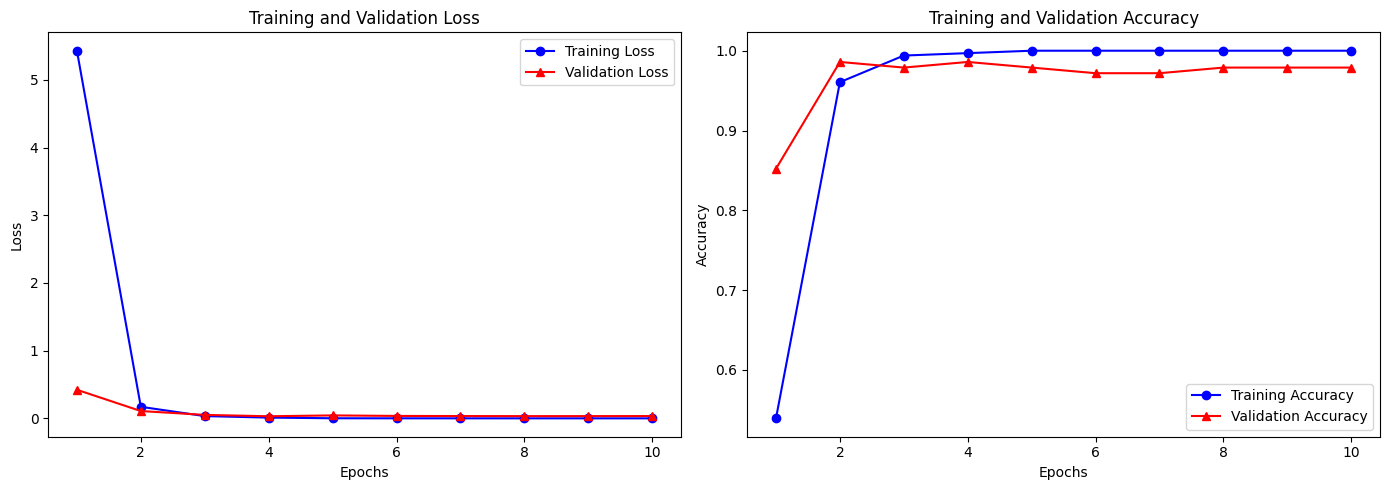

In [20]:
#Obter os valores de histórico
train_loss = history0.history['loss']
val_loss = history0.history['val_loss']
train_accuracy = history0.history['accuracy']
val_accuracy = history0.history['val_accuracy']

# Criar os gráficos
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_l = modelo0_l + [img_buf]

plt.show()




5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
[2 1 1 1 2 2 2 2 1 2 1 1 0 2 2 0 2 0 0 2 2 2 1 2 0 0 0 0 1 1 1 1 2 2 2 0 2
 2 1 2 0 0 1 2 2 1 0 2 2 2 2 1 2 2 1 2 0 2 0 0 1 0 0 1 2 0 0 1 0 2 1 0 0 0
 0 0 0 2 1 2 2 0 2 0 0 2 2 2 1 1 2 2 0 2 1 2 1 1 2 1 2 1 0 1 0 0 2 1 1 0 0
 2 0 2 2 0 1 2 0 2 0 2 1 0 0 0 2 2 1 2 2 0 2 2 2 0 2 2 1 2 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]


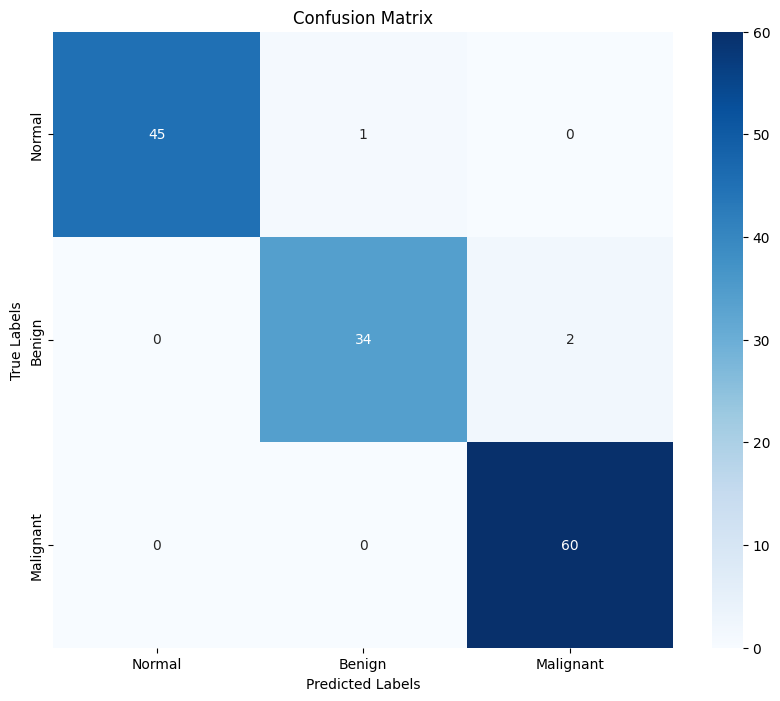

In [21]:

# Faça previsões no conjunto de dados de teste
predictions = model_cnn0.predict(x_test)

# Converter previsões one-hot encoded para rótulos de classe
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print(y_test)

y_true= np.argmax(y_test, axis=1)
print(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)



# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
report=classification_report(y_true,y_pred)

print(report)


# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_l = modelo0_l + [img_buf, report]

plt.show()




In [22]:
# Guardar dados no dicionario
Dados_Modelos['Modelo 0'] = modelo0_l


### 4.1.1 Modelo 0_1

In [23]:
modelo0_1_l = ['Modelo 0_1 - Modelo Com mais neuronios e camadas']
model_cnn0_1 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 3)), # Primeira camada de convolução
    MaxPooling2D((2, 2)), # Pooling

    Conv2D(64, (5, 5), activation='relu'), # Segunda camada de convolução
    MaxPooling2D((2, 2)), # Pooling

    Conv2D(128, (5, 5), activation='relu'), # Terceira camada de convolução
    MaxPooling2D((2, 2)), # Pooling

    Flatten(),

    Dense(504, activation='relu'),
   
    Dense(3, activation='softmax')
])

# Compilar o modelo
model_cnn0_1.compile(optimizer='adam',
                         loss='crossentropy', 
                         metrics=['accuracy'])
# Exibir o resumo do modelo
summary = model_cnn0_1.summary()
# Adicionar Modelo antes do treino e o seu summary
modelo0_1_l = modelo0_1_l + [model_cnn0_1, summary]
summary

c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 57, 57, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 504)            │    50,577,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,838,051 (193.93 MB)

 Trainable params: 50,838,051 (193.93 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history0_1 = model_cnn0_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Avalie o modelo usando os dados de teste
loss, accuracy = model_cnn0_1.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Adicionar Modelo pos treino, seu history e test accuracy
modelo0_1_l = modelo0_1_l + [model_cnn0_1, history0_1, accuracy]



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3125 - loss: 4.5910 - val_accuracy: 0.3310 - val_loss: 1.1085
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4821 - loss: 1.0371 - val_accuracy: 0.6761 - val_loss: 0.9008
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7216 - loss: 0.8047 - val_accuracy: 0.7887 - val_loss: 0.6126
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8649 - loss: 0.4081 - val_accuracy: 0.8732 - val_loss: 0.3513
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9432 - loss: 0.2619 - val_accuracy: 0.8873 - val_loss: 0.3150
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9399 - loss: 0.1896 - val_accuracy: 0.9155 - val_loss: 0.2671
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9642 - loss: 0.1181 - val_accuracy: 0.9296 - val_loss: 0.1813
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9613 - loss: 0.1105 - val_accuracy: 0.9648 - val_loss:

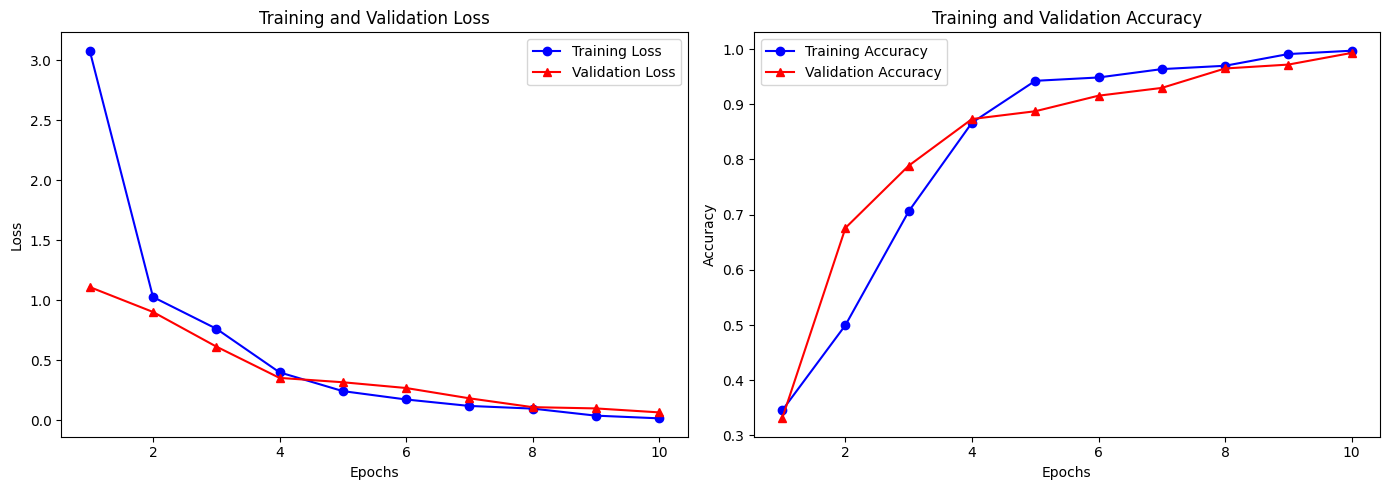

In [25]:
#Obter os valores de histórico
train_loss = history0_1.history['loss']
val_loss = history0_1.history['val_loss']
train_accuracy = history0_1.history['accuracy']
val_accuracy = history0_1.history['val_accuracy']

# Criar os gráficos
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_1_l = modelo0_1_l + [img_buf]

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
[2 1 1 1 2 2 2 2 1 2 1 1 0 2 2 0 2 0 0 2 2 2 1 2 0 0 0 0 1 2 1 1 2 2 2 0 2
 2 1 2 0 0 1 2 2 1 0 2 2 2 2 1 2 2 1 2 0 1 0 0 1 0 0 1 2 0 0 1 0 2 1 0 0 0
 0 0 0 2 1 2 2 0 2 0 0 2 2 2 1 1 2 2 0 2 1 2 1 1 2 1 2 1 0 1 0 0 2 1 1 0 0
 2 0 2 2 0 1 2 0 2 0 2 1 0 0 0 1 2 1 2 2 0 2 2 2 0 2 2 1 2 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]


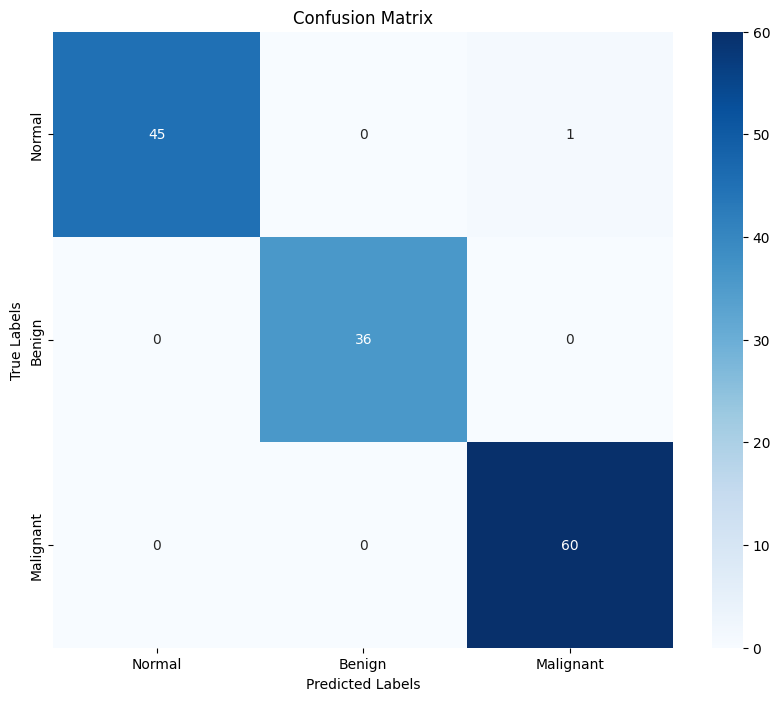

In [26]:
# Faça previsões no conjunto de dados de teste
predictions = model_cnn0_1.predict(x_test)

# Converter previsões one-hot encoded para rótulos de classe
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print(y_test)

y_true= np.argmax(y_test, axis=1)
print(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)



# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
report=classification_report(y_true,y_pred)

print(report)

 

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_1_l = modelo0_1_l + [img_buf, report]

plt.show()


In [27]:
# Guardar dados no dicionario
Dados_Modelos['Modelo 0_1'] = modelo0_1_l


### 4.1.2 Modelo 0_2

In [28]:
# Definir o modelo CNN

# Adicionar descrição do Modelo
modelo0_2_l = ['Modelo 2 - Modelo 0 com menos camadas']
model_cnn0_2= Sequential([
   Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)), # 1ª camada de convolução kernel= 3*3 
    MaxPooling2D(2, 2),
    Flatten(),# Achatamento dos nossos mapas de caracteristicas

    Dense(1024, activation='relu'), 
    
    Dense(3, activation='softmax')
])

# Compilar o modelo
model_cnn0_2.compile(optimizer='adam',
                  loss='crossentropy',
                  metrics=['accuracy'])

# Exibir o resumo do modelo
summary = model_cnn0_2.summary()
# Adicionar Modelo antes do treino e o seu summary
modelo0_2_l = modelo0_2_l + [model_cnn0_2, summary]
summary

c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 258064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │   264,258,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,262,083 (1008.08 MB)

 Trainable params: 264,262,083 (1008.08 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history0_2 = model_cnn0_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Avalie o modelo usando os dados de teste
loss, accuracy = model_cnn0_2.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Adicionar Modelo pos treino, seu history e test accuracy
modelo0_2_l = modelo0_2_l + [model_cnn0_2, history0_2, accuracy]


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.3633 - loss: 12.9028 - val_accuracy: 0.7465 - val_loss: 0.8385
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9097 - loss: 0.3432 - val_accuracy: 0.9507 - val_loss: 0.1125
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9973 - loss: 0.0118 - val_accuracy: 0.9718 - val_loss: 0.0597
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 8.7497e-04 - val_accuracy: 0.9789 - val_loss: 0.0392
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 1.6887e-04 - val_accuracy: 0.9789 - val_loss: 0.0385
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 1.0000 - loss: 5.7200e-05 - val_accuracy: 0.9789 - val_loss: 0.0374
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 3.9451e-05 - val_accuracy: 0.9789 - val_loss: 0.0347
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 2.7303e-05 - val_accurac

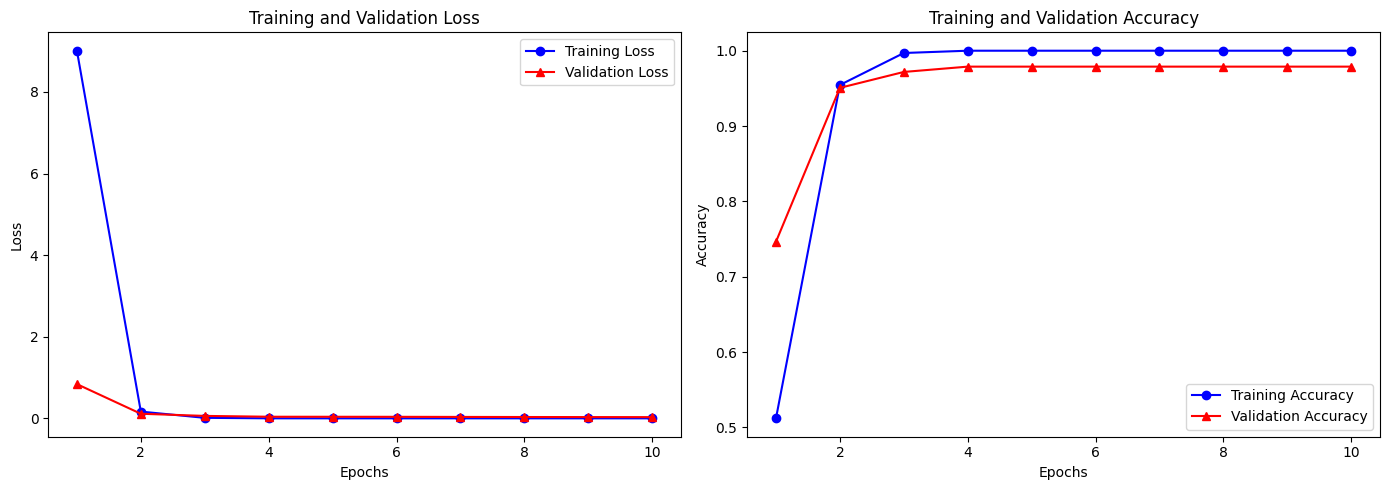

In [30]:
#Obter os valores de histórico
train_loss = history0_2.history['loss']
val_loss = history0_2.history['val_loss']
train_accuracy = history0_2.history['accuracy']
val_accuracy = history0_2.history['val_accuracy']

# Criar os gráficos
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_2_l = modelo0_2_l + [img_buf]

plt.show()




4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024FD9C40C20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
[2 1 1 1 2 2 2 2 1 2 1 1 0 2 2 0 2 0 0 2 2 2 1 2 0 0 0 0 1 1 1 1 2 2 2 0 2
 2 1 2 0 0 1 2 2 1 0 2 2 2 2 1 2 2 1 2 0 2 0 0 1 0 0 1 2 0 0 1 0 2 1 0 0 0
 0 0 0 2 1 2 2 0 2 0 0 2 2 2 1 1 2 2 0 2 1 2 1

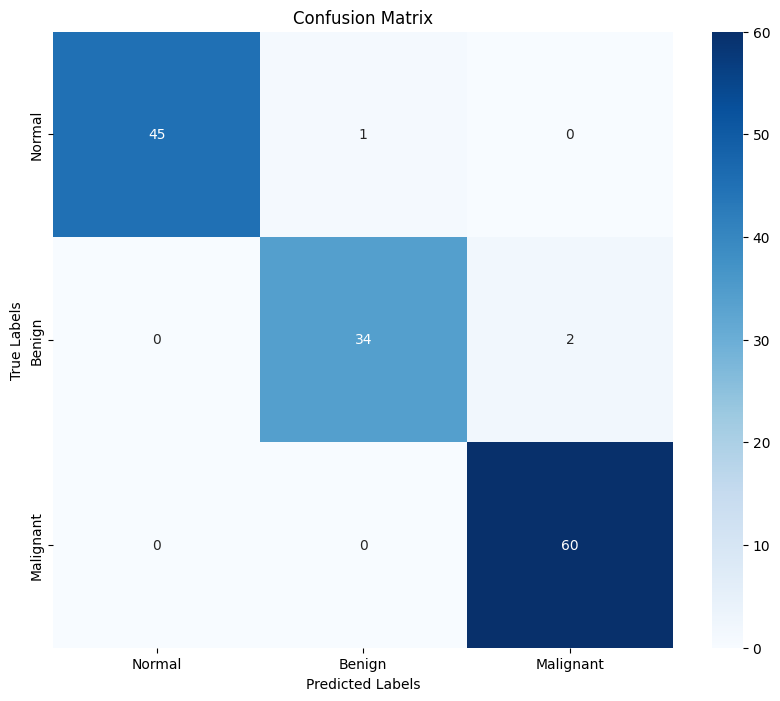

In [31]:

# Faça previsões no conjunto de dados de teste
predictions = model_cnn0_2.predict(x_test)

# Converter previsões one-hot encoded para rótulos de classe
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print(y_test)

y_true= np.argmax(y_test, axis=1)
print(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)



# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
report=classification_report(y_true,y_pred)

print(report)


# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo0_2_l = modelo0_2_l + [img_buf, report]

plt.show()




In [32]:
# Guardar dados no dicionario
Dados_Modelos['Modelo 0_2'] = modelo0_2_l


# 5. Resumo de resultados




['Modelo 0 - Modelo sem qualquer optimização', <Sequential name=sequential, built=True>, None, <Sequential name=sequential, built=True>, <keras.src.callbacks.history.History object at 0x0000024FBF6A50A0>, 0.9788732528686523, <_io.BytesIO object at 0x0000024FAE45FCE0>, <_io.BytesIO object at 0x0000024FBF5EFD30>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       0.97      0.94      0.96        36\n           2       0.97      1.00      0.98        60\n\n    accuracy                           0.98       142\n   macro avg       0.98      0.97      0.98       142\nweighted avg       0.98      0.98      0.98       142\n']
Modelo 0
Descrição:
 Modelo 0 - Modelo sem qualquer optimização


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,908,139 (1.41 GB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,938,760 (961.07 MB)

History:
 Epoch: 1
accuracy: 0.539393961429596; loss: 5.43208122253418; val_accuracy: 0.8521126508712769; val_loss: 0.4221208989620209; 

Epoch: 2
accuracy: 0.960606038570404; loss: 0.17036794126033783; val_accuracy: 0.98591548204422; val_loss: 0.10784731805324554; 

Epoch: 3
accuracy: 0.9939393997192383; loss: 0.03327145427465439; val_accuracy: 0.9788732528686523; val_loss: 0.05099497735500336; 

Epoch: 4
accuracy: 0.9969696998596191; loss: 0.011087574064731598; val_accuracy: 0.98591548204422; val_loss: 0.03089226223528385; 

Epoch: 5
accuracy: 1.0; loss: 0.0011412556050345302; val_accuracy: 0.9788732528686523; val_loss: 0.043285734951496124; 

Epoch: 6
accuracy: 1.0; loss: 0.0005287330714054406; val_accuracy: 0.9718309640884399; val_loss: 0.03580590710043907; 

Epoch: 7
accuracy: 1.0; loss: 0.00019293678633403033; val_accuracy: 0.9718309640884399; val_loss: 0.033877696841955185; 

Epoch: 8
accuracy: 1.0; loss: 0.00012488907668739557; val_accuracy: 0.9788732528686523; val_loss: 0.0327

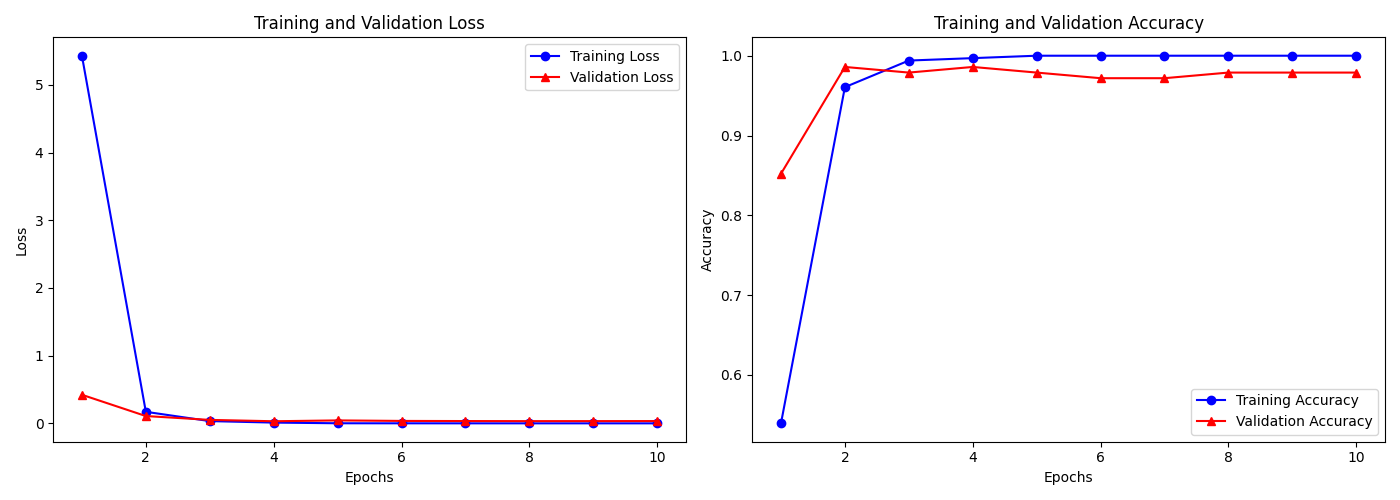

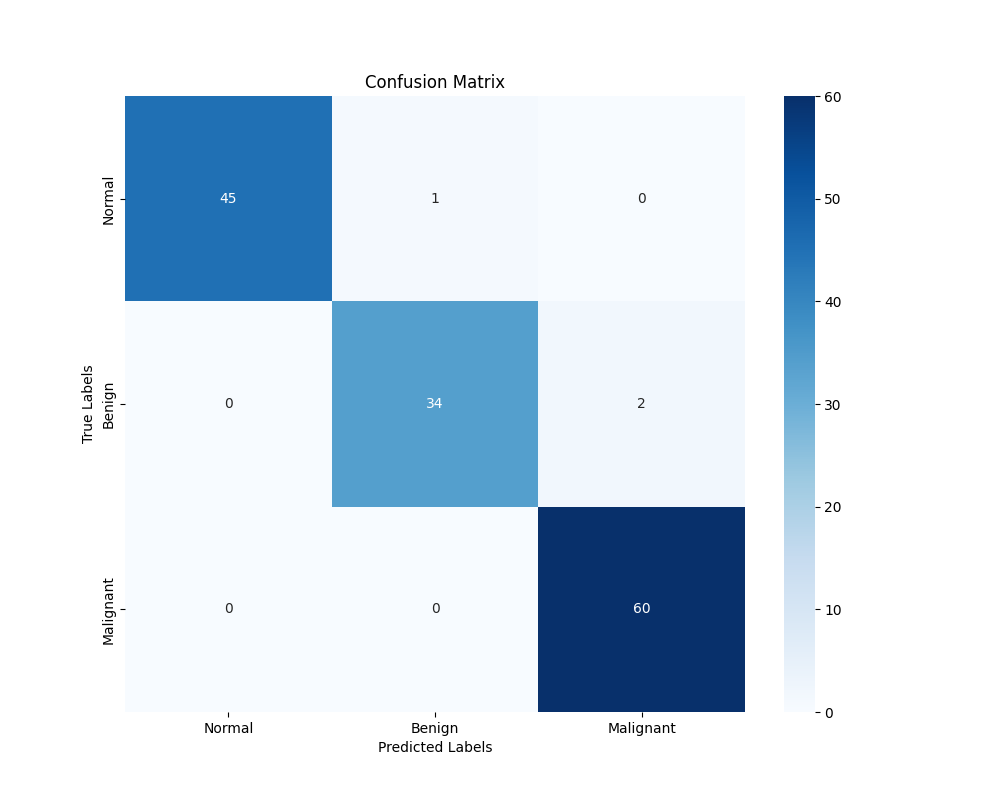

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      0.94      0.96        36
           2       0.97      1.00      0.98        60

    accuracy                           0.98       142
   macro avg       0.98      0.97      0.98       142
weighted avg       0.98      0.98      0.98       142




['Modelo 0_1 - Modelo Com mais neuronios e camadas', <Sequential name=sequential_1, built=True>, None, <Sequential name=sequential_1, built=True>, <keras.src.callbacks.history.History object at 0x0000024FBF672FC0>, 0.9929577708244324, <_io.BytesIO object at 0x0000024FAE4E3C90>, <_io.BytesIO object at 0x0000024FC00D20C0>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       1.00      1.00      1.00        36\n           2       0.98      1.00      0.99        60\n\n    accuracy                           0.99       142\n   macro avg 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 57, 57, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 504)            │    50,577,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,514,155 (581.80 MB)

 Trainable params: 50,838,051 (193.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,676,104 (387.86 MB)

History:
 Epoch: 1
accuracy: 0.34545454382896423; loss: 3.0783636569976807; val_accuracy: 0.3309859037399292; val_loss: 1.1084917783737183; 

Epoch: 2
accuracy: 0.5; loss: 1.025321364402771; val_accuracy: 0.6760563254356384; val_loss: 0.9007978439331055; 

Epoch: 3
accuracy: 0.7060605883598328; loss: 0.7615221738815308; val_accuracy: 0.7887324094772339; val_loss: 0.6125664114952087; 

Epoch: 4
accuracy: 0.8666666746139526; loss: 0.3977071940898895; val_accuracy: 0.8732394576072693; val_loss: 0.35132932662963867; 

Epoch: 5
accuracy: 0.9424242377281189; loss: 0.24118196964263916; val_accuracy: 0.8873239159584045; val_loss: 0.3150389790534973; 

Epoch: 6
accuracy: 0.9484848380088806; loss: 0.17142567038536072; val_accuracy: 0.9154929518699646; val_loss: 0.26706182956695557; 

Epoch: 7
accuracy: 0.9636363387107849; loss: 0.11761193722486496; val_accuracy: 0.9295774698257446; val_loss: 0.1812685877084732; 

Epoch: 8
accuracy: 0.9696969985961914; loss: 0.09547804296016693; val_accuracy: 0.9

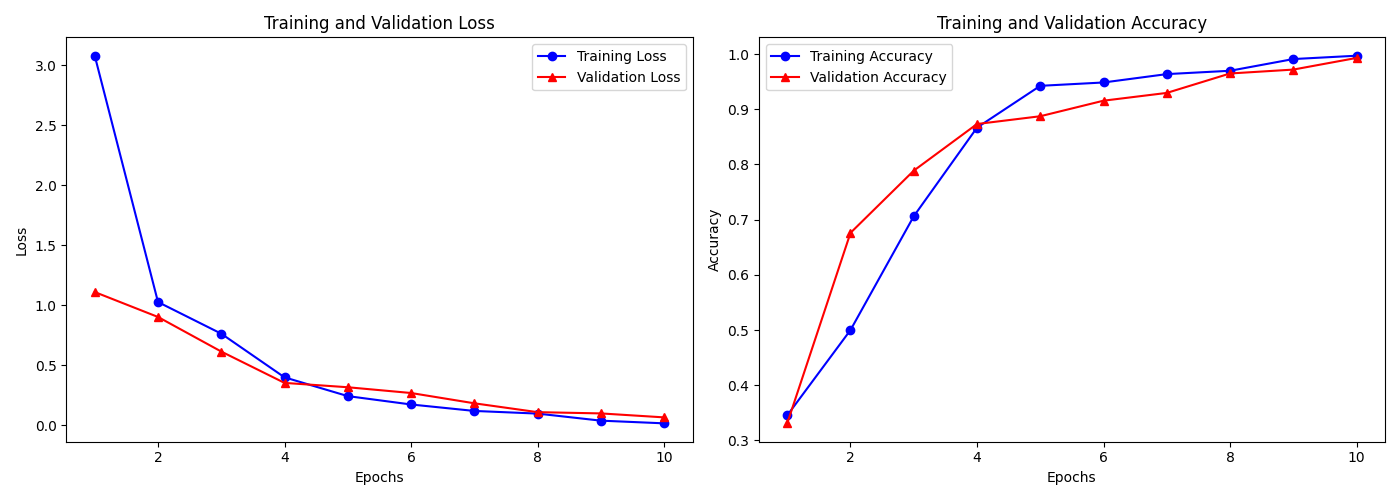

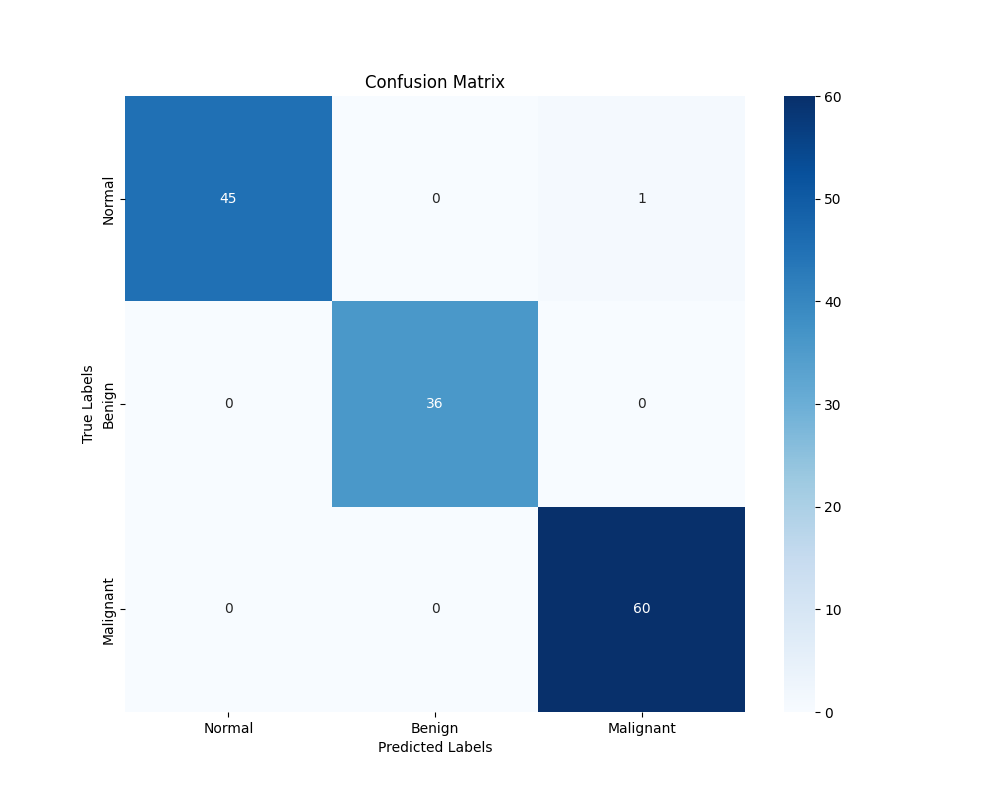

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       1.00      1.00      1.00        36
           2       0.98      1.00      0.99        60

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142




['Modelo 2 - Modelo 0 com menos camadas', <Sequential name=sequential_2, built=True>, None, <Sequential name=sequential_2, built=True>, <keras.src.callbacks.history.History object at 0x0000024FC0079D00>, 0.9788732528686523, <_io.BytesIO object at 0x0000024FC017FD30>, <_io.BytesIO object at 0x0000024FD9F87EC0>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       0.97      0.94      0.96        36\n           2       0.97      1.00      0.98        60\n\n    accuracy                           0.98       142\n   macro avg       0.98 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 258064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │   264,258,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 792,786,251 (2.95 GB)

 Trainable params: 264,262,083 (1008.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 528,524,168 (1.97 GB)

History:
 Epoch: 1
accuracy: 0.5121212005615234; loss: 9.009424209594727; val_accuracy: 0.7464788556098938; val_loss: 0.8384697437286377; 

Epoch: 2
accuracy: 0.9545454382896423; loss: 0.16536001861095428; val_accuracy: 0.9507042169570923; val_loss: 0.11247069388628006; 

Epoch: 3
accuracy: 0.9969696998596191; loss: 0.012232769280672073; val_accuracy: 0.9718309640884399; val_loss: 0.05968169867992401; 

Epoch: 4
accuracy: 1.0; loss: 0.0004974160110577941; val_accuracy: 0.9788732528686523; val_loss: 0.039191242307424545; 

Epoch: 5
accuracy: 1.0; loss: 0.00010501842916710302; val_accuracy: 0.9788732528686523; val_loss: 0.038457415997982025; 

Epoch: 6
accuracy: 1.0; loss: 5.570866778725758e-05; val_accuracy: 0.9788732528686523; val_loss: 0.03741496801376343; 

Epoch: 7
accuracy: 1.0; loss: 3.748411836568266e-05; val_accuracy: 0.9788732528686523; val_loss: 0.034695666283369064; 

Epoch: 8
accuracy: 1.0; loss: 2.6581690690363757e-05; val_accuracy: 0.9788732528686523; val_loss: 0.032614525

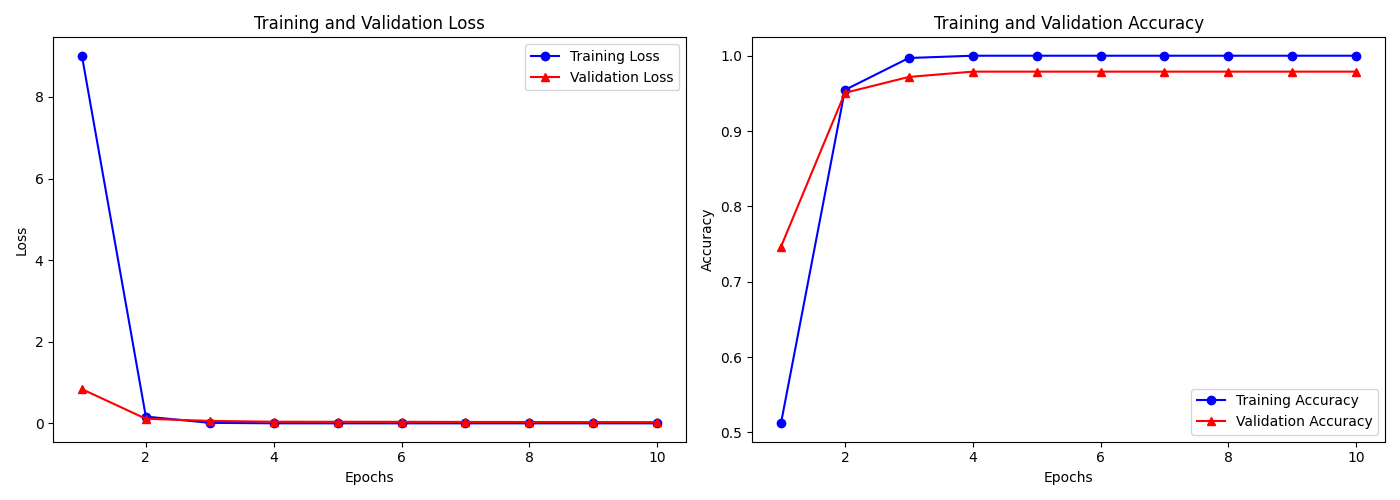

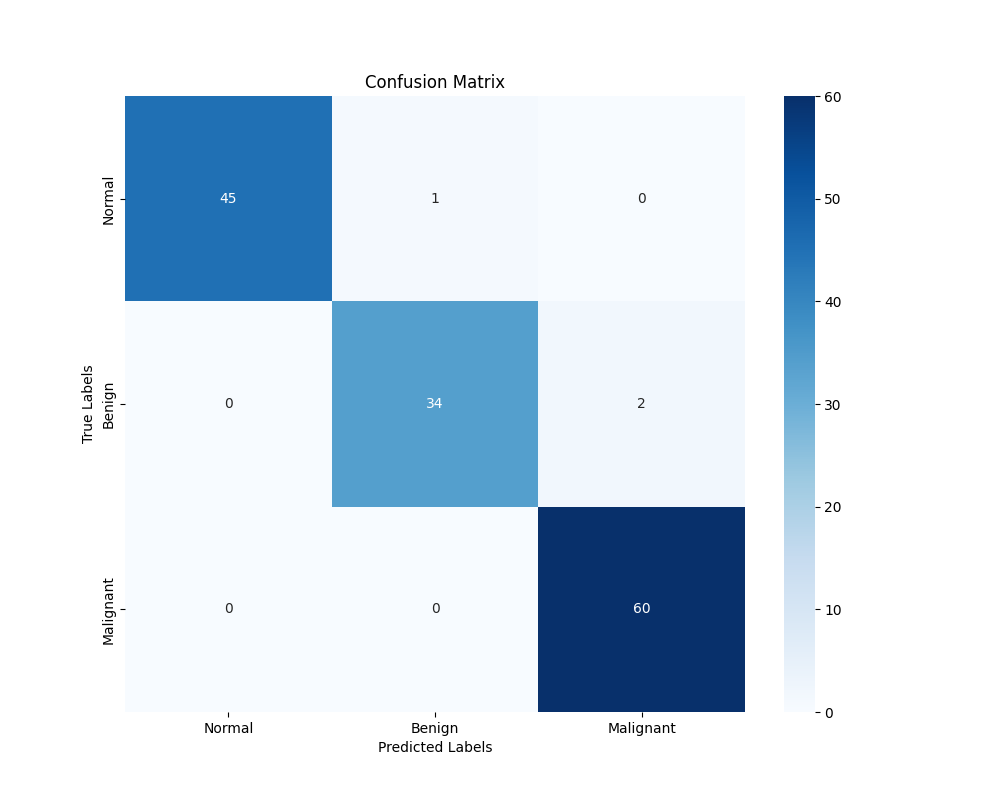

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      0.94      0.96        36
           2       0.97      1.00      0.98        60

    accuracy                           0.98       142
   macro avg       0.98      0.97      0.98       142
weighted avg       0.98      0.98      0.98       142



In [33]:

for modelo in Dados_Modelos.keys():
    print('\n\n')
    modelo_l = Dados_Modelos[modelo]
    
    print(modelo_l)
    print(modelo)
    print('Descrição:\n',modelo_l[0])
    modelo_l[1].summary()
    lines_history=''
    i=0
    while i< len(modelo_l[4].history['accuracy']):
        line='Epoch: '+str(i+1)+'\n'
        for key in modelo_l[4].history.keys():
            line =line+ str(key)+': '+ str(modelo_l[4].history[key][i]) + '; '
        i=i+1
        lines_history=lines_history+line+'\n\n'

    print('History:\n',lines_history)
    print('Test Accuracy:\n',modelo_l[5])

    im = Image.open(modelo_l[6])
    display(im)

    im = Image.open(modelo_l[7])
    display(im)
    print(modelo_l[-1])

# 6. Modelo escolhido

O modelo escolhido foi o Modelo 0. Os testes que fizemos com mais e menos camadas, neuronios e aumento de filtro kernel embora tenham tido resultados precisos não mostram melhorias significativas.
No modelo 0_1 foram alteradas a kernel para 5x5 (ao invés de 3x3), o numero de camadas de Conv2D e MaxPooling2D (de duas de cada vs tres de cada), assim como o numero de filtros de cada camada. Não resutlou em ganhos significativos.
No sentido oposto o modelo 0_2, tem menos camadas. Foram diminuidas as camadas Conv2D e MaxPooling2D para um de cada, o resultado foi um treino que demorou perto do dobro do tempo refletindo menor eficiencia computacional. Os resultados foram semelhantes aos modelos anteriores.




['Modelo 0 - Modelo sem qualquer optimização', <Sequential name=sequential, built=True>, None, <Sequential name=sequential, built=True>, <keras.src.callbacks.history.History object at 0x0000024FBF6A50A0>, 0.9788732528686523, <_io.BytesIO object at 0x0000024FAE45FCE0>, <_io.BytesIO object at 0x0000024FBF5EFD30>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       0.97      0.94      0.96        36\n           2       0.97      1.00      0.98        60\n\n    accuracy                           0.98       142\n   macro avg       0.98      0.97      0.98       142\nweighted avg       0.98      0.98      0.98       142\n']
Modelo 0
Descrição:
 Modelo 0 - Modelo sem qualquer optimização


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,908,139 (1.41 GB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,938,760 (961.07 MB)

History:
 Epoch: 1
accuracy: 0.539393961429596; loss: 5.43208122253418; val_accuracy: 0.8521126508712769; val_loss: 0.4221208989620209; 

Epoch: 2
accuracy: 0.960606038570404; loss: 0.17036794126033783; val_accuracy: 0.98591548204422; val_loss: 0.10784731805324554; 

Epoch: 3
accuracy: 0.9939393997192383; loss: 0.03327145427465439; val_accuracy: 0.9788732528686523; val_loss: 0.05099497735500336; 

Epoch: 4
accuracy: 0.9969696998596191; loss: 0.011087574064731598; val_accuracy: 0.98591548204422; val_loss: 0.03089226223528385; 

Epoch: 5
accuracy: 1.0; loss: 0.0011412556050345302; val_accuracy: 0.9788732528686523; val_loss: 0.043285734951496124; 

Epoch: 6
accuracy: 1.0; loss: 0.0005287330714054406; val_accuracy: 0.9718309640884399; val_loss: 0.03580590710043907; 

Epoch: 7
accuracy: 1.0; loss: 0.00019293678633403033; val_accuracy: 0.9718309640884399; val_loss: 0.033877696841955185; 

Epoch: 8
accuracy: 1.0; loss: 0.00012488907668739557; val_accuracy: 0.9788732528686523; val_loss: 0.0327

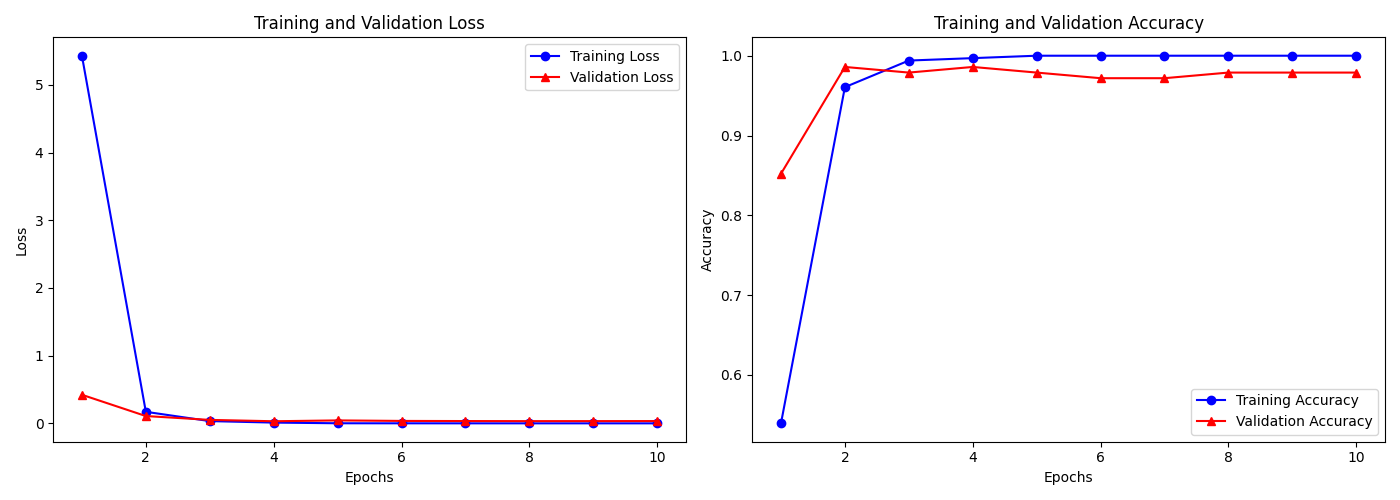

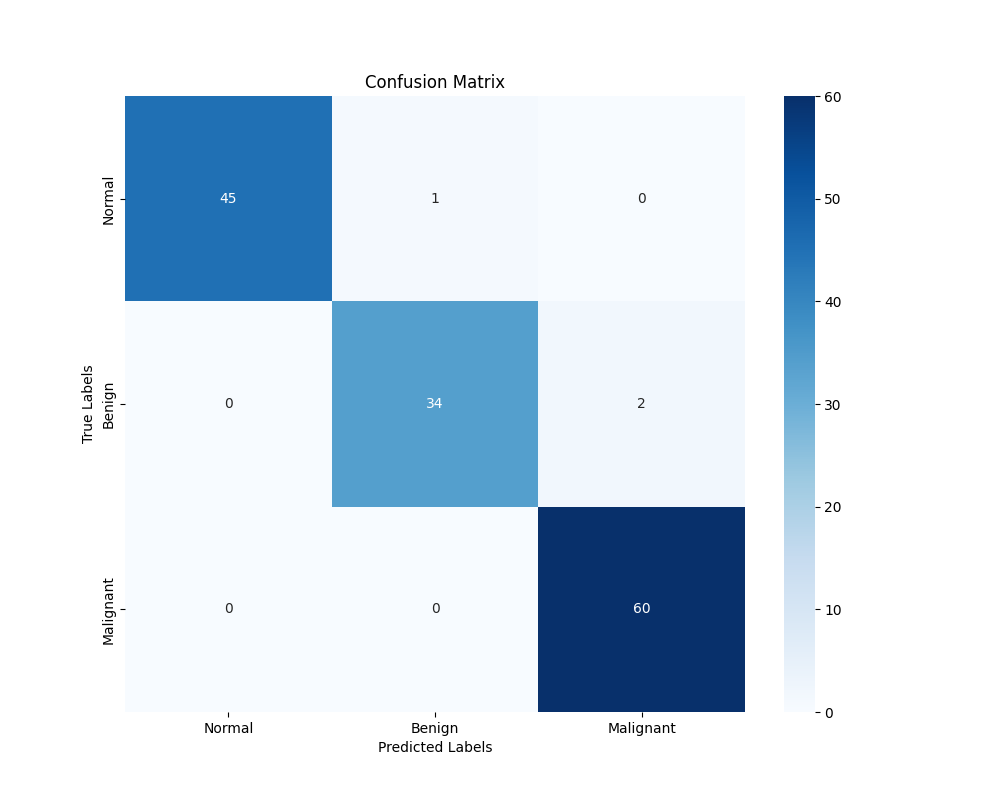

In [34]:
modelo='Modelo 0'
print('\n\n')
modelo_l = Dados_Modelos[modelo]
print(modelo_l)
print(modelo)
print('Descrição:\n',modelo_l[0])
modelo_l[1].summary()
lines_history=''
i=0
while i< len(modelo_l[4].history['accuracy']):
    line='Epoch: '+str(i+1)+'\n'
    for key in modelo_l[4].history.keys():
        line =line+ str(key)+': '+ str(modelo_l[4].history[key][i]) + '; '
    i=i+1
    lines_history=lines_history+line+'\n\n'

print('History:\n',lines_history)
print('Test Accuracy:\n',modelo_l[5])

im = Image.open(modelo_l[6])
display(im)

im = Image.open(modelo_l[7])
display(im)

## 6.1. Previsões no conjunto de dados para o modelo escolhido

Visualizar amostra e fazer previsões

In [35]:
# Selecionar uma amostra do conjunto de dados de teste
index = 82 # Podemos mudar este índice para visualizar outras amostras
sample_image = X_test[index]
sample_label = y_test[index]


[0. 0. 1.]


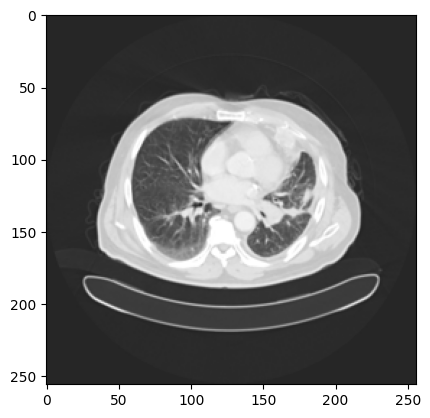

In [36]:
print(sample_label)
plt.imshow(sample_image.reshape(256, 256, 3))

In [37]:
# Fazer a previsão usando o modelo treinado
predicted_class = model_cnn0.predict(np.expand_dims(sample_image, axis=0))

predicted_label = np.argmax(predicted_class)
predicted_label 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


2

In [38]:
true_label = y_test[index]
print(f"True label (one-hot): {true_label}")
   

True label (one-hot): [0. 0. 1.]


## 6.2. Visualização LIME

In [39]:
#Seleção de samples

sample_malignant = np.where(np.all(y_test == [0., 0., 1.], axis=1))[0][10]
sample_normal = np.where(np.all(y_test == [ 1., 0., 0.], axis=1))[0][0]
sample_benign = np.where(np.all(y_test == [0., 1., 0.], axis=1))[0][0]
print(sample_normal,sample_benign,sample_malignant)

def segment_image(image):
    # Primeiro, convertemos a imagem RGB para escala de cinza porque o SLIC funciona em imagens de intensidade única
    # Se a sua imagem já está em escala de cinza ou você sabe que a entrada já está correta, você pode pular esta conversão
    gray_image = rgb2gray(image) if image.ndim == 3 and image.shape[2] == 3 else image
    
    # Aplicando o SLIC para segmentar a imagem em superpixels
    # O número de segmentos e compactness podem ser ajustados conforme necessário
    segments = slic(gray_image, n_segments=100, compactness=10, channel_axis=None)
    return segments

# Função de predição ajustada
def predict_fn(images):
    # Redimensionar as imagens para o tamanho esperado pelo modelo
    resized_images = []
    for img in images:
        img_pil = Image.fromarray(img.astype('uint8'))  # Converter para imagem PIL
        resized_img = img_pil.resize((256, 256))  # Redimensionar para 256x256 pixels
        resized_img = np.array(resized_img)  # Converter de volta para numpy array
        resized_images.append(resized_img)
    
    resized_images = np.array(resized_images)  # Converter para numpy array
    return model_cnn0.predict(resized_images)

12 1 20


### 6.2.1. Normal

In [40]:
sample_image = X_test[sample_normal]

In [41]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    sample_image,  # Imagem em RGB
    predict_fn,        # Função de previsão
    top_labels=1,      # Número de rótulos superiores a considerar
    num_samples=1000,  # Número de amostras a gerar para a explicação
    segmentation_fn=segment_image
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 10/1000 [00:00<00:22, 44.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  2%|▏         | 20/1000 [00:00<00:16, 57.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  3%|▎         | 30/1000 [00:00<00:14, 66.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  4%|▍         | 40/1000 [00:00<00:13, 69.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 50/1000 [00:00<00:13, 70.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 60/1000 [00:00<00:12, 72.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  7%|▋         | 70/1000 [00:01<00:12, 72.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  8%|▊         | 80/1000 [00:01<00:12, 74.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  9%|▉         | 90/1000 [00:01<00:12, 74.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|█         | 100/1000 [00:01<00:11, 76.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 11%|█         | 110/1000 [00:01<00:11, 77.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 12%|█▏        | 120/1000 [00:01<00:11, 76.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 77.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 14%|█▍        | 140/1000 [00:01<00:11, 78.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▌        | 150/1000 [00:02<00:10, 77.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 77.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 76.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 76.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 77.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 20%|██        | 200/1000 [00:02<00:10, 78.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 210/1000 [00:02<00:10, 77.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 22%|██▏       | 220/1000 [00:02<00:10, 76.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 23%|██▎       | 230/1000 [00:03<00:10, 75.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 74.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 25%|██▌       | 250/1000 [00:03<00:10, 74.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 26%|██▌       | 260/1000 [00:03<00:09, 76.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 27%|██▋       | 270/1000 [00:03<00:09, 77.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 28%|██▊       | 280/1000 [00:03<00:09, 78.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 29%|██▉       | 290/1000 [00:03<00:09, 77.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 30%|███       | 300/1000 [00:03<00:08, 79.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 31%|███       | 310/1000 [00:04<00:08, 78.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 32%|███▏      | 320/1000 [00:04<00:08, 78.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 33%|███▎      | 330/1000 [00:04<00:08, 78.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 34%|███▍      | 340/1000 [00:04<00:08, 79.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 35%|███▌      | 350/1000 [00:04<00:08, 79.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 36%|███▌      | 360/1000 [00:04<00:07, 80.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 37%|███▋      | 370/1000 [00:04<00:07, 79.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 38%|███▊      | 380/1000 [00:05<00:07, 79.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 39%|███▉      | 390/1000 [00:05<00:07, 79.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 40%|████      | 400/1000 [00:05<00:07, 79.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 41%|████      | 410/1000 [00:05<00:07, 78.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 79.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 79.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 44%|████▍     | 440/1000 [00:05<00:07, 79.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 450/1000 [00:05<00:07, 75.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 74.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 73.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 48%|████▊     | 480/1000 [00:06<00:06, 75.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 76.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 50%|█████     | 500/1000 [00:06<00:06, 77.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 51%|█████     | 510/1000 [00:06<00:06, 77.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 52%|█████▏    | 520/1000 [00:06<00:06, 76.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 53%|█████▎    | 530/1000 [00:06<00:06, 75.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 76.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 55%|█████▌    | 550/1000 [00:07<00:05, 75.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 74.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 75.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 58%|█████▊    | 580/1000 [00:07<00:05, 76.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 59%|█████▉    | 590/1000 [00:07<00:05, 76.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 60%|██████    | 600/1000 [00:07<00:05, 74.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 61%|██████    | 610/1000 [00:08<00:05, 74.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 62%|██████▏   | 620/1000 [00:08<00:05, 73.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 63%|██████▎   | 630/1000 [00:08<00:04, 74.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 73.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 65%|██████▌   | 650/1000 [00:08<00:04, 72.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 66%|██████▌   | 660/1000 [00:08<00:04, 73.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 67%|██████▋   | 670/1000 [00:08<00:04, 72.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 70.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 71.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 70%|███████   | 700/1000 [00:09<00:04, 72.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 71%|███████   | 710/1000 [00:09<00:03, 74.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 75.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 73%|███████▎  | 730/1000 [00:09<00:03, 76.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 74%|███████▍  | 740/1000 [00:09<00:03, 76.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 75%|███████▌  | 750/1000 [00:09<00:03, 75.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 74.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 77%|███████▋  | 770/1000 [00:10<00:03, 73.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 78%|███████▊  | 780/1000 [00:10<00:02, 73.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 73.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|████████  | 800/1000 [00:10<00:02, 74.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 81%|████████  | 810/1000 [00:10<00:02, 74.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 82%|████████▏ | 820/1000 [00:10<00:02, 74.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 74.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 72.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 85%|████████▌ | 850/1000 [00:11<00:02, 74.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 86%|████████▌ | 860/1000 [00:11<00:01, 76.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 77.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 78.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 89%|████████▉ | 890/1000 [00:11<00:01, 78.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 90%|█████████ | 900/1000 [00:11<00:01, 77.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 77.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 92%|█████████▏| 920/1000 [00:12<00:01, 74.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 93%|█████████▎| 930/1000 [00:12<00:00, 74.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 94%|█████████▍| 940/1000 [00:12<00:00, 74.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 95%|█████████▌| 950/1000 [00:12<00:00, 74.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 96%|█████████▌| 960/1000 [00:12<00:00, 75.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 97%|█████████▋| 970/1000 [00:12<00:00, 76.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 98%|█████████▊| 980/1000 [00:12<00:00, 77.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 78.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


100%|██████████| 1000/1000 [00:13<00:00, 75.62it/s]


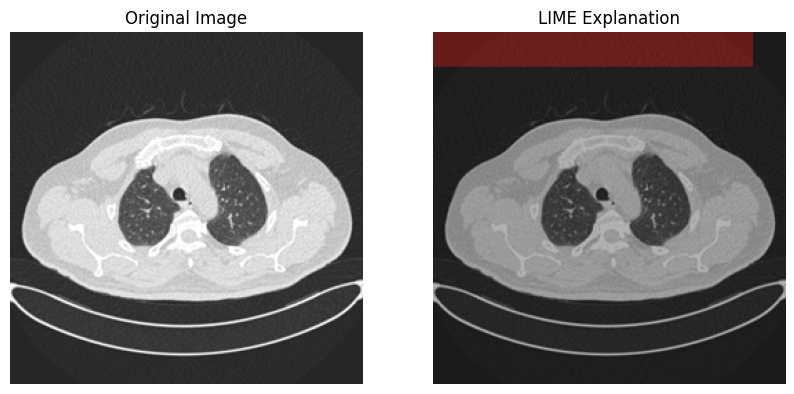

In [42]:
# Supondo que 'explanation' é o objeto de explicação retornado pelo LIME
# e 'sample_image' é a imagem original pré-processada.

# Obtendo a imagem e a máscara da explicação para a classe com maior probabilidade
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # A classe com a maior probabilidade
    positive_only=False,         # Mostra apenas as contribuições positivas
    num_features=10,            # Limita o número de superpixels a serem mostrados
    hide_rest=False             # Não esconde o resto da imagem, apenas destaca os superpixels
)

# Converte a imagem 2D de volta para escala de cinza para melhor visualização
# Adicionando o parâmetro 'alpha' para ajustar a transparência
image_label_overlay = label2rgb(mask, sample_image, bg_label=0)

# Plotando a imagem original e a explicação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Imagem original
ax1.imshow(sample_image)
ax1.set_title('Original Image')
ax1.axis('off')

# Imagem com a explicação
ax2.imshow(image_label_overlay)
ax2.set_title('LIME Explanation')
ax2.axis('off')


plt.show()

### 6.2.2. Benigno

In [43]:
sample_image = X_test[sample_benign]

In [44]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    sample_image,  # Imagem em RGB
    predict_fn,        # Função de previsão
    top_labels=1,      # Número de rótulos superiores a considerar
    num_samples=1000,  # Número de amostras a gerar para a explicação
    segmentation_fn=segment_image
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|          | 10/1000 [00:00<00:13, 73.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  2%|▏         | 20/1000 [00:00<00:13, 72.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 30/1000 [00:00<00:13, 72.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  4%|▍         | 40/1000 [00:00<00:13, 72.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 50/1000 [00:00<00:13, 71.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 60/1000 [00:00<00:12, 73.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  7%|▋         | 70/1000 [00:00<00:12, 75.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  8%|▊         | 80/1000 [00:01<00:12, 76.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  9%|▉         | 90/1000 [00:01<00:11, 77.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 10%|█         | 100/1000 [00:01<00:11, 76.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 110/1000 [00:01<00:11, 75.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 71.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 73.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 140/1000 [00:01<00:11, 74.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 15%|█▌        | 150/1000 [00:02<00:11, 76.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 160/1000 [00:02<00:11, 76.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 77.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 78.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 78.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|██        | 200/1000 [00:02<00:10, 77.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 21%|██        | 210/1000 [00:02<00:10, 78.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 220/1000 [00:02<00:11, 67.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 230/1000 [00:03<00:11, 67.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 70.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 25%|██▌       | 250/1000 [00:04<00:27, 27.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 26%|██▌       | 260/1000 [00:04<00:21, 33.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 27%|██▋       | 270/1000 [00:04<00:17, 40.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 28%|██▊       | 280/1000 [00:04<00:15, 47.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 29%|██▉       | 290/1000 [00:04<00:13, 52.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 30%|███       | 300/1000 [00:04<00:11, 59.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 31%|███       | 310/1000 [00:04<00:10, 64.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 32%|███▏      | 320/1000 [00:05<00:09, 68.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 33%|███▎      | 330/1000 [00:05<00:09, 72.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 34%|███▍      | 340/1000 [00:05<00:08, 73.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 35%|███▌      | 350/1000 [00:05<00:08, 76.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 36%|███▌      | 360/1000 [00:05<00:08, 76.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 37%|███▋      | 370/1000 [00:05<00:08, 76.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 38%|███▊      | 380/1000 [00:05<00:08, 76.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 73.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 40%|████      | 400/1000 [00:06<00:07, 75.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 41%|████      | 410/1000 [00:06<00:07, 76.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 42%|████▏     | 420/1000 [00:06<00:07, 76.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 43%|████▎     | 430/1000 [00:06<00:07, 74.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 44%|████▍     | 440/1000 [00:06<00:07, 75.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 75.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 75.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 75.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 48%|████▊     | 480/1000 [00:07<00:06, 74.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 49%|████▉     | 490/1000 [00:07<00:06, 73.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 50%|█████     | 500/1000 [00:07<00:06, 72.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 51%|█████     | 510/1000 [00:07<00:06, 70.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 52%|█████▏    | 520/1000 [00:07<00:06, 71.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 74.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 75.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 55%|█████▌    | 550/1000 [00:08<00:05, 76.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 56%|█████▌    | 560/1000 [00:08<00:05, 75.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 57%|█████▋    | 570/1000 [00:08<00:05, 75.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 58%|█████▊    | 580/1000 [00:08<00:05, 76.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 75.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 60%|██████    | 600/1000 [00:08<00:05, 75.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 61%|██████    | 610/1000 [00:08<00:05, 75.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 62%|██████▏   | 620/1000 [00:09<00:05, 75.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 63%|██████▎   | 630/1000 [00:09<00:04, 75.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 64%|██████▍   | 640/1000 [00:09<00:04, 75.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 65%|██████▌   | 650/1000 [00:09<00:04, 73.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 66%|██████▌   | 660/1000 [00:09<00:04, 69.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 68.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 69.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 69%|██████▉   | 690/1000 [00:10<00:04, 70.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 70%|███████   | 700/1000 [00:10<00:04, 72.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 71%|███████   | 710/1000 [00:10<00:03, 73.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 72%|███████▏  | 720/1000 [00:10<00:03, 73.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 72.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 74.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 75.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 73.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 77%|███████▋  | 770/1000 [00:11<00:03, 65.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 78%|███████▊  | 780/1000 [00:11<00:03, 67.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 79%|███████▉  | 790/1000 [00:11<00:03, 68.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|████████  | 800/1000 [00:11<00:02, 71.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 81%|████████  | 810/1000 [00:11<00:02, 71.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 72.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 73.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 84%|████████▍ | 840/1000 [00:12<00:02, 74.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 85%|████████▌ | 850/1000 [00:12<00:01, 75.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 86%|████████▌ | 860/1000 [00:12<00:01, 75.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 74.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 88%|████████▊ | 880/1000 [00:12<00:01, 75.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 76.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 73.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 91%|█████████ | 910/1000 [00:13<00:01, 73.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 92%|█████████▏| 920/1000 [00:13<00:01, 73.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 93%|█████████▎| 930/1000 [00:13<00:00, 74.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 94%|█████████▍| 940/1000 [00:13<00:00, 72.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 95%|█████████▌| 950/1000 [00:13<00:00, 72.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 96%|█████████▌| 960/1000 [00:13<00:00, 73.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 74.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 75.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 99%|█████████▉| 990/1000 [00:14<00:00, 76.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


100%|██████████| 1000/1000 [00:14<00:00, 70.36it/s]


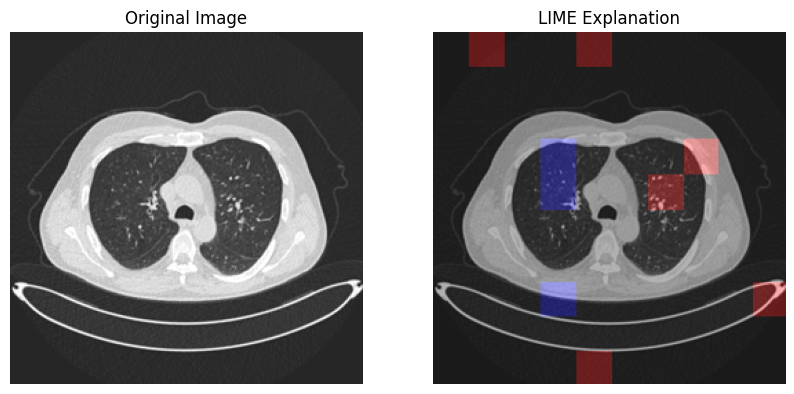

In [45]:
# Supondo que 'explanation' é o objeto de explicação retornado pelo LIME
# e 'sample_image' é a imagem original pré-processada.

# Obtendo a imagem e a máscara da explicação para a classe com maior probabilidade
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # A classe com a maior probabilidade
    positive_only=False,         # Mostra apenas as contribuições positivas
    num_features=10,            # Limita o número de superpixels a serem mostrados
    hide_rest=False             # Não esconde o resto da imagem, apenas destaca os superpixels
)

# Converte a imagem 2D de volta para escala de cinza para melhor visualização
# Adicionando o parâmetro 'alpha' para ajustar a transparência
image_label_overlay = label2rgb(mask, sample_image, bg_label=0)

# Plotando a imagem original e a explicação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Imagem original
ax1.imshow(sample_image)
ax1.set_title('Original Image')
ax1.axis('off')

# Imagem com a explicação
ax2.imshow(image_label_overlay)
ax2.set_title('LIME Explanation')
ax2.axis('off')


plt.show()

### 6.2.3. Maligno

In [46]:
sample_image = X_test[sample_malignant]

In [47]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    sample_image,  # Imagem em RGB
    predict_fn,        # Função de previsão
    top_labels=1,      # Número de rótulos superiores a considerar
    num_samples=1000,  # Número de amostras a gerar para a explicação
    segmentation_fn=segment_image
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  1%|          | 10/1000 [00:00<00:12, 77.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  2%|▏         | 20/1000 [00:00<00:12, 76.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  3%|▎         | 30/1000 [00:00<00:12, 74.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  4%|▍         | 40/1000 [00:00<00:12, 74.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 50/1000 [00:00<00:12, 75.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 60/1000 [00:00<00:12, 76.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 70/1000 [00:00<00:12, 76.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  8%|▊         | 80/1000 [00:01<00:12, 75.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▉         | 90/1000 [00:01<00:11, 76.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|█         | 100/1000 [00:01<00:11, 77.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 110/1000 [00:01<00:11, 77.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 72.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 130/1000 [00:01<00:12, 70.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 140/1000 [00:01<00:12, 69.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 150/1000 [00:02<00:12, 68.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 160/1000 [00:02<00:12, 68.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 170/1000 [00:02<00:11, 69.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 180/1000 [00:02<00:11, 70.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 190/1000 [00:02<00:12, 66.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 20%|██        | 200/1000 [00:02<00:11, 69.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 21%|██        | 210/1000 [00:02<00:11, 71.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 22%|██▏       | 220/1000 [00:03<00:10, 71.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 23%|██▎       | 230/1000 [00:03<00:10, 71.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 73.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 25%|██▌       | 250/1000 [00:03<00:10, 73.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 72.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 27%|██▋       | 270/1000 [00:03<00:09, 74.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 28%|██▊       | 280/1000 [00:03<00:09, 74.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 290/1000 [00:03<00:09, 73.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 30%|███       | 300/1000 [00:04<00:09, 71.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 31%|███       | 310/1000 [00:04<00:09, 71.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 320/1000 [00:04<00:11, 59.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 330/1000 [00:04<00:11, 58.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▍      | 340/1000 [00:04<00:10, 61.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 65.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 360/1000 [00:05<00:09, 67.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 370/1000 [00:05<00:09, 67.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 38%|███▊      | 380/1000 [00:05<00:09, 68.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 69.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 400/1000 [00:05<00:08, 70.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 41%|████      | 410/1000 [00:05<00:08, 72.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 74.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 43%|████▎     | 430/1000 [00:06<00:07, 73.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 44%|████▍     | 440/1000 [00:06<00:07, 73.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 73.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 73.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 74.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 48%|████▊     | 480/1000 [00:06<00:06, 74.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 75.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 50%|█████     | 500/1000 [00:06<00:06, 76.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 51%|█████     | 510/1000 [00:07<00:06, 75.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 52%|█████▏    | 520/1000 [00:07<00:06, 74.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 72.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 74.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 55%|█████▌    | 550/1000 [00:07<00:06, 73.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 74.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 74.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 58%|█████▊    | 580/1000 [00:08<00:05, 74.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 74.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 60%|██████    | 600/1000 [00:08<00:05, 74.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 61%|██████    | 610/1000 [00:08<00:05, 73.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 62%|██████▏   | 620/1000 [00:08<00:05, 74.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 63%|██████▎   | 630/1000 [00:08<00:04, 74.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 76.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 65%|██████▌   | 650/1000 [00:08<00:04, 75.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 66%|██████▌   | 660/1000 [00:09<00:04, 74.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 74.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 75.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 76.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 70%|███████   | 700/1000 [00:09<00:03, 77.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 71%|███████   | 710/1000 [00:09<00:03, 77.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 78.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 78.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 78.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 78.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 78.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 77%|███████▋  | 770/1000 [00:10<00:02, 78.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 78%|███████▊  | 780/1000 [00:10<00:02, 78.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 78.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|████████  | 800/1000 [00:10<00:02, 77.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 81%|████████  | 810/1000 [00:11<00:02, 76.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 76.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 76.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 77.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 85%|████████▌ | 850/1000 [00:11<00:02, 74.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 86%|████████▌ | 860/1000 [00:11<00:01, 75.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 74.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 75.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 76.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 77.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 76.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 92%|█████████▏| 920/1000 [00:12<00:01, 77.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 93%|█████████▎| 930/1000 [00:12<00:00, 77.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 94%|█████████▍| 940/1000 [00:12<00:00, 77.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 95%|█████████▌| 950/1000 [00:12<00:00, 76.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 96%|█████████▌| 960/1000 [00:13<00:00, 74.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 73.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 69.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 71.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


100%|██████████| 1000/1000 [00:13<00:00, 73.56it/s]


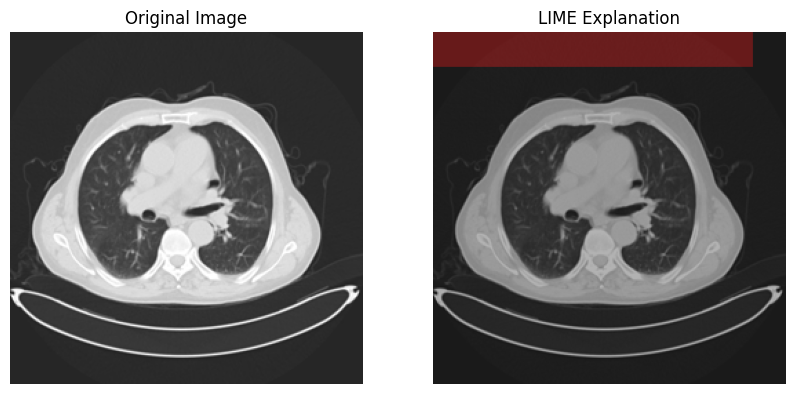

In [48]:
# Supondo que 'explanation' é o objeto de explicação retornado pelo LIME
# e 'sample_image' é a imagem original pré-processada.

# Obtendo a imagem e a máscara da explicação para a classe com maior probabilidade
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # A classe com a maior probabilidade
    positive_only=False,         # Mostra apenas as contribuições positivas
    num_features=10,            # Limita o número de superpixels a serem mostrados
    hide_rest=False             # Não esconde o resto da imagem, apenas destaca os superpixels
)

# Converte a imagem 2D de volta para escala de cinza para melhor visualização
# Adicionando o parâmetro 'alpha' para ajustar a transparência
image_label_overlay = label2rgb(mask, sample_image, bg_label=0)

# Plotando a imagem original e a explicação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Imagem original
ax1.imshow(sample_image)
ax1.set_title('Original Image')
ax1.axis('off')

# Imagem com a explicação
ax2.imshow(image_label_overlay)
ax2.set_title('LIME Explanation')
ax2.axis('off')


plt.show()

# 7. Anexo - Modelos usando tecnicas de regularização de overfitting

Estes modelos foram elaborados com o objectivo académico de explorar a sua aplicação prática, embora soubessemos de antemão que os nossos modelos não apresentam overfitting.
Ao regularizar o L2, estamos a aplicar uma penalização nos pesos da rede CNN. 
No Early Stopping estamos a validar quando é que existe um ponto de inflexão na curva de teste (val_loss), tendo em conta que o nosso modelo base não apresenta overfittng foi diminuida a patience no sentido de verificar-se um ponto de inflexão falso. Assim ao verificar duas epocas consecutivas de val_loss sem melhoria o treino termina.

## 7.1. Modelo1

In [49]:
Dados_Modelos = {}

### 7.1.1 Regularizar L2 = 0.001

In [50]:
# Definir o modelo CNN
# Adicionar descrição do Modelo
modelo1_1_l = ['Modelo 1_1 - Modelo com regularização L2 a 0.001'] 
model_cnn1_1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3),kernel_regularizer=l2(0.001)), # 1ª camada de convolução kernel= 3*3 
    MaxPooling2D(2, 2), #AveragePooling2D(2,2) #SumPooling2D(2,2) 

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),# Achatamento dos nossos mapas de caracteristicas

    Dense(1024, activation='relu'), 
    
    Dense(3, activation='softmax')
])

# Compilar o modelo
model_cnn1_1.compile(optimizer='adam',
                  loss='crossentropy',
                  metrics=['accuracy'])

# Adicionar Modelo antes do treino e o seu summary
modelo1_1_l = modelo1_1_l + [model_cnn1_1, summary]

# Exibir o resumo do modelo
model_cnn1_1.summary()



c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,969,379 (480.54 MB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
print('fit:')
history1_1 = model_cnn1_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Avalie o modelo usando os dados de teste
print('dados teste - evaluate:')
loss, accuracy = model_cnn1_1.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')


#Obter os valores de histórico
train_loss = history1_1.history['loss']
val_loss = history1_1.history['val_loss']
train_accuracy = history1_1.history['accuracy']
val_accuracy = history1_1.history['val_accuracy']

# Adicionar Modelo pos treino, seu history e test accuracy
modelo1_1_l = modelo1_1_l + [model_cnn1_1, history1_1, accuracy]


fit:
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3200 - loss: 18.2328 - val_accuracy: 0.5704 - val_loss: 0.9307
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8059 - loss: 0.5156 - val_accuracy: 0.9648 - val_loss: 0.1499
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9665 - loss: 0.0802 - val_accuracy: 0.9789 - val_loss: 0.0598
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 0.9930 - val_loss: 0.0376
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9718 - val_loss: 0.0446
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9930 - val_loss: 0.0317
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9930 - val

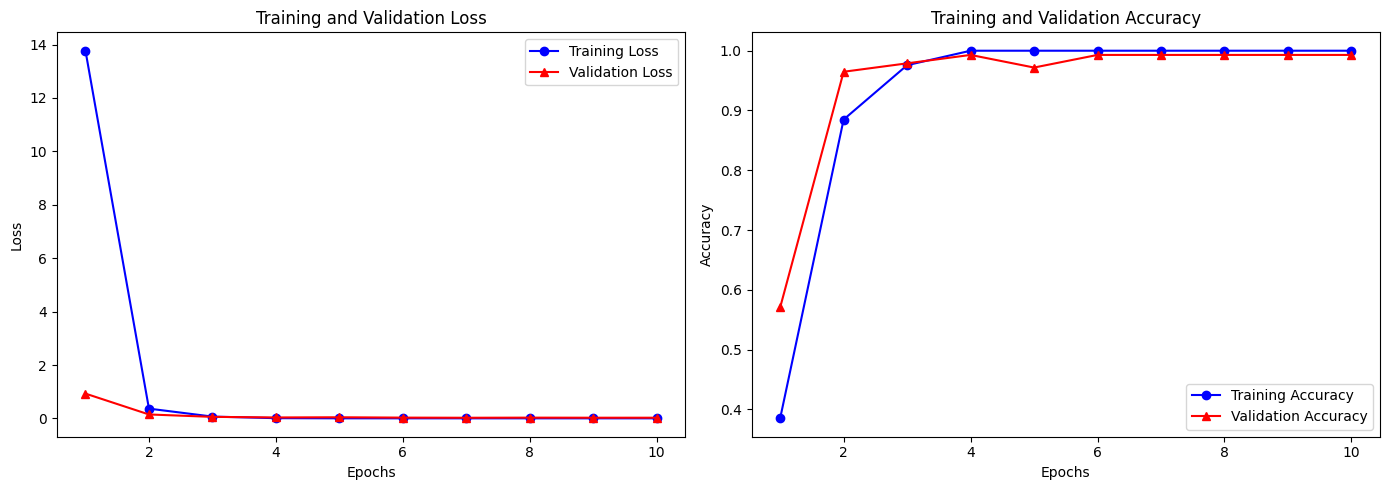

In [52]:
#Obter os valores de histórico
train_loss = history1_1.history['loss']
val_loss = history1_1.history['val_loss']
train_accuracy = history1_1.history['accuracy']
val_accuracy = history1_1.history['val_accuracy']

# Criar os gráficos
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo1_1_l = modelo1_1_l + [img_buf]

plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
[2 1 1 1 2 2 2 2 1 2 1 1 0 2 2 0 2 0 0 2 2 2 1 2 0 0 0 0 1 1 1 1 2 2 2 0 2
 2 1 2 0 0 1 2 2 1 0 2 2 2 2 1 2 2 1 2 0 1 0 0 1 0 0 1 2 0 0 1 0 2 1 0 0 0
 0 0 0 2 1 2 2 0 2 0 0 2 2 2 1 1 2 2 0 2 1 2 1 1 2 1 2 1 0 1 0 0 2 1 1 0 0
 2 0 2 2 0 1 2 0 2 0 2 1 0 0 0 1 2 1 2 2 0 2 2 2 0 2 2 1 2 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]


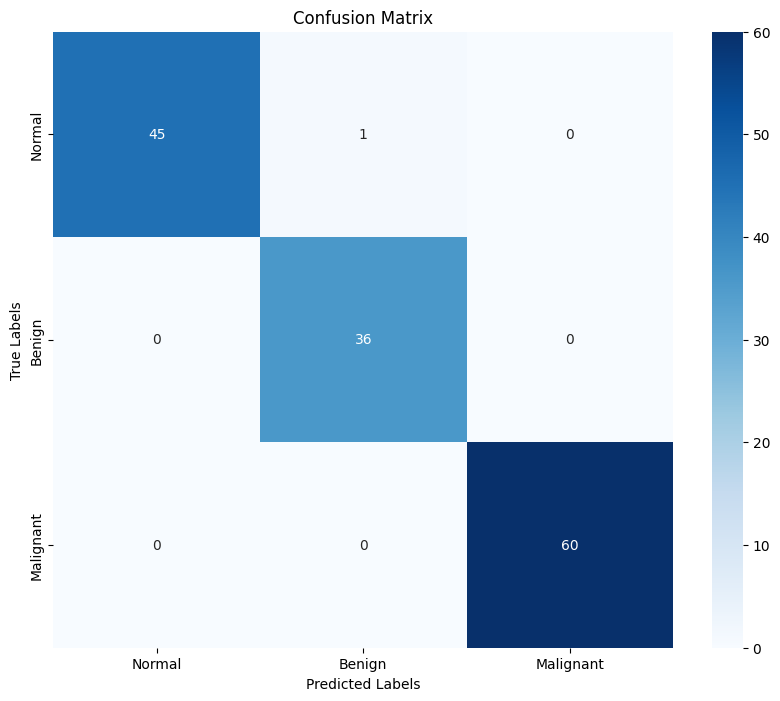

In [53]:
# Faça previsões no conjunto de dados de teste
predictions = model_cnn1_1.predict(x_test)

# Converter previsões one-hot encoded para rótulos de classe
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print(y_test)

y_true= np.argmax(y_test, axis=1)
print(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)


# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
report=classification_report(y_true,y_pred)

print(report)


# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo1_1_l = modelo1_1_l + [img_buf, report]

plt.show()

In [54]:
# Guardar dados no dicionario
Dados_Modelos['Modelo 1_1'] = modelo1_1_l

## 7.2. Modelo 2

### 7.2.1. Earlystopping (Modelo 0 -> Patience =2)

In [55]:
# Definir o modelo CNN

# Adicionar descrição do Modelo
modelo2_1_l = ['Modelo 2_1 - Modelo baseado no Modelo 0 com earlystopping patience 2']

model_cnn2_1 = Sequential([
   Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)), # 1ª camada de convolução kernel= 3*3 
    MaxPooling2D(2, 2), #AveragePooling2D(2,2) #SumPooling2D(2,2) 

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),# Achatamento dos nossos mapas de caracteristicas

    Dense(1024, activation='relu'), 
    
    Dense(3, activation='softmax')
])

# Compilar o modelo
model_cnn2_1.compile(optimizer='adam',
                  loss='crossentropy',
                  metrics=['accuracy'])

# Exibir o resumo do modelo
model_cnn2_1.summary()

# Adicionar Modelo antes do treino e o seu summary
modelo2_1_l = modelo2_1_l + [model_cnn2_1, summary]

c:\Users\raque\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,969,379 (480.54 MB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
early_stopping_p2 = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [57]:
print('fit:')
history2_p2 = model_cnn2_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping_p2])

# Avalie o modelo usando os dados de teste
print('dados teste - evaluate:')
loss, accuracy = model_cnn2_1.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Adicionar Modelo pos treino, seu history e test accuracy
modelo2_1_l = modelo2_1_l + [model_cnn2_1, history2_p2, accuracy]


fit:
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3582 - loss: 28.0281 - val_accuracy: 0.7394 - val_loss: 0.5986
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7211 - loss: 1.3323 - val_accuracy: 0.9085 - val_loss: 0.3199
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9596 - loss: 0.1710 - val_accuracy: 0.9718 - val_loss: 0.1336
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9951 - loss: 0.0393 - val_accuracy: 0.9718 - val_loss: 0.0616
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9945 - loss: 0.0134 - val_accuracy: 0.9930 - val_loss: 0.0389
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9930 - val_loss: 0.0241
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 6.8774e-04 - val_accuracy: 0.9930 - val_loss: 0.0227
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 4.6668e-04 - val_accuracy: 0.99

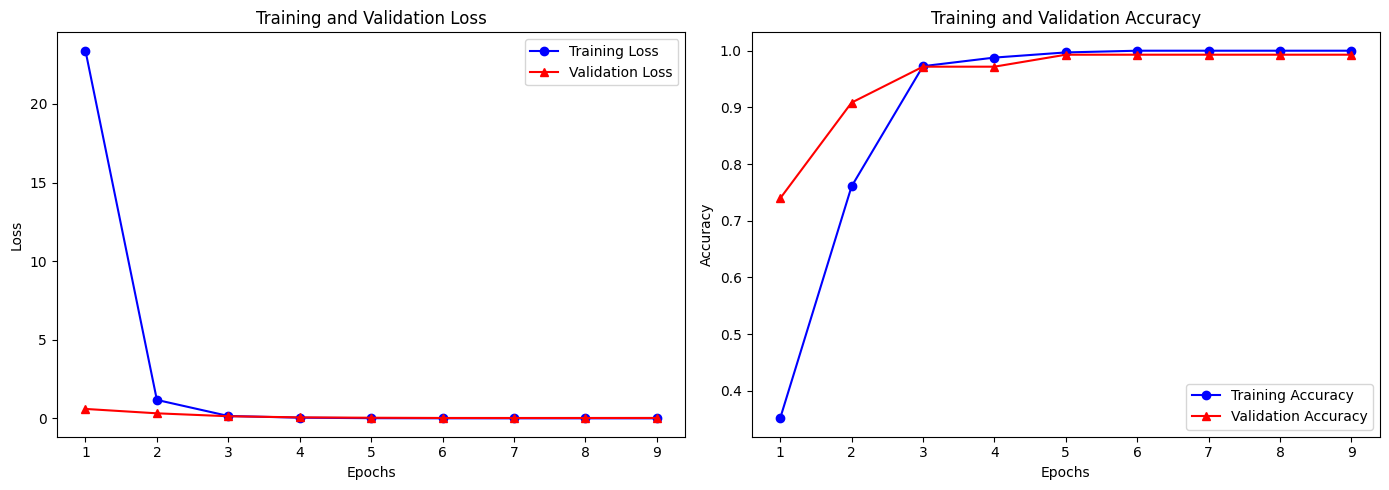

In [58]:
#Obter os valores de histórico
train_loss = history2_p2.history['loss']
val_loss = history2_p2.history['val_loss']
train_accuracy = history2_p2.history['accuracy']
val_accuracy = history2_p2.history['val_accuracy']

# Criar os gráficos
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()


# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo2_1_l = modelo2_1_l + [img_buf]

plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
[2 1 1 1 2 2 2 2 1 2 1 1 0 2 2 0 2 0 0 2 2 2 1 2 0 0 0 0 1 1 1 1 2 2 2 0 2
 2 1 2 0 0 1 2 2 1 0 2 2 2 2 1 2 2 1 2 0 1 0 0 1 0 0 1 2 0 0 1 0 2 1 0 0 0
 0 0 0 2 1 2 2 0 2 0 0 2 2 2 1 1 2 2 0 2 1 2 1 1 2 1 2 1 0 1 0 0 2 1 1 0 0
 2 0 2 2 0 1 2 0 2 0 2 1 0 0 0 1 2 1 2 2 0 2 2 2 0 2 2 1 2 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]


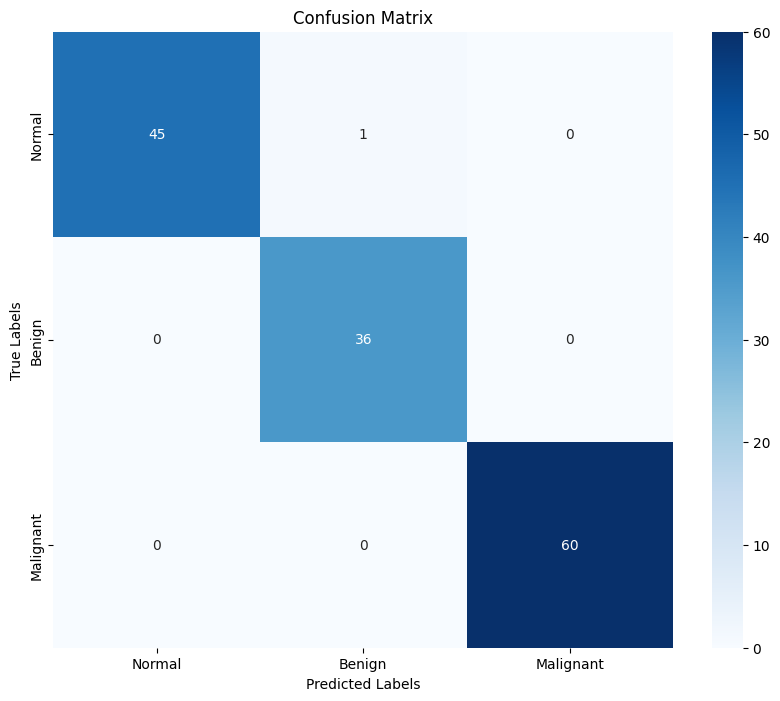

In [59]:

# Faça previsões no conjunto de dados de teste
predictions = model_cnn2_1.predict(x_test)

# Converter previsões one-hot encoded para rótulos de classe
y_pred = np.argmax(predictions, axis=1)
print(y_pred)
print(y_test)

y_true= np.argmax(y_test, axis=1)
print(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)



# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
report=classification_report(y_true,y_pred)

print(report)

# Adicionar graficos
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')
modelo2_1_l = modelo2_1_l + [img_buf, report]

plt.show()





In [60]:
# Guardar dados no dicionario
Dados_Modelos['Modelo 2_1'] = modelo2_1_l

## 7.3. Resumo de resultados




['Modelo 1_1 - Modelo com regularização L2 a 0.001', <Sequential name=sequential_3, built=True>, None, <Sequential name=sequential_3, built=True>, <keras.src.callbacks.history.History object at 0x0000024FC01492B0>, 0.9929577708244324, <_io.BytesIO object at 0x0000024FBF97F7E0>, <_io.BytesIO object at 0x0000024FD96B3E20>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       0.97      1.00      0.99        36\n           2       1.00      1.00      1.00        60\n\n    accuracy                           0.99       142\n   macro avg       0.99      0.99      0.99       142\nweighted avg       0.99      0.99      0.99       142\n']
Modelo 1_1
Descrição:
 Modelo 1_1 - Modelo com regularização L2 a 0.001


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,908,139 (1.41 GB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,938,760 (961.07 MB)

History:
 Epoch: 1
accuracy: 0.3848484754562378; loss: 13.768646240234375; val_accuracy: 0.5704225301742554; val_loss: 0.9306728839874268; 

Epoch: 2
accuracy: 0.8848484754562378; loss: 0.3682098388671875; val_accuracy: 0.9647887349128723; val_loss: 0.14991530776023865; 

Epoch: 3
accuracy: 0.9757575988769531; loss: 0.07040203362703323; val_accuracy: 0.9788732528686523; val_loss: 0.05984564870595932; 

Epoch: 4
accuracy: 1.0; loss: 0.010925162583589554; val_accuracy: 0.9929577708244324; val_loss: 0.03759732097387314; 

Epoch: 5
accuracy: 1.0; loss: 0.005523241125047207; val_accuracy: 0.9718309640884399; val_loss: 0.04464752599596977; 

Epoch: 6
accuracy: 1.0; loss: 0.004884824156761169; val_accuracy: 0.9929577708244324; val_loss: 0.031685300171375275; 

Epoch: 7
accuracy: 1.0; loss: 0.004719986580312252; val_accuracy: 0.9929577708244324; val_loss: 0.026508864015340805; 

Epoch: 8
accuracy: 1.0; loss: 0.004662677180022001; val_accuracy: 0.9929577708244324; val_loss: 0.030827445909380913

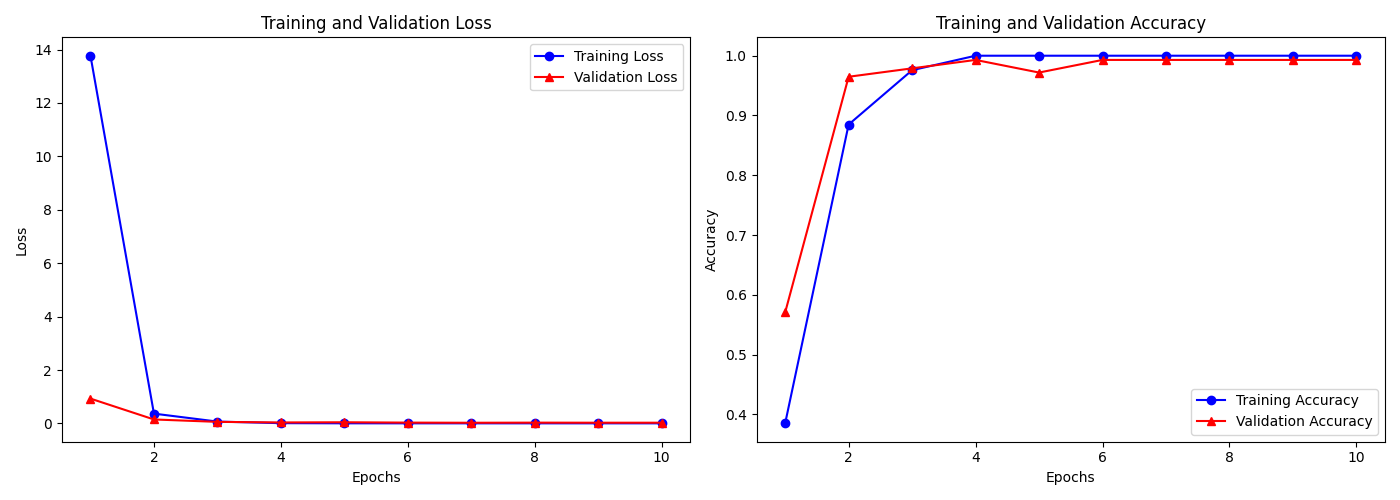

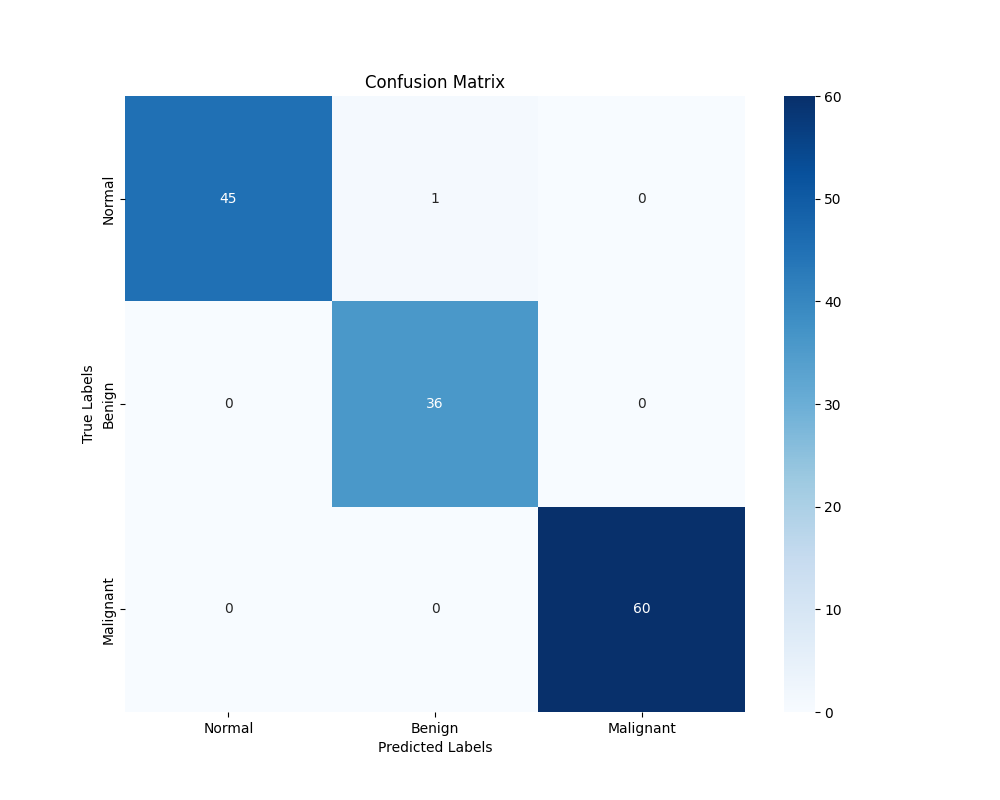

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        60

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142




['Modelo 2_1 - Modelo baseado no Modelo 0 com earlystopping patience 2', <Sequential name=sequential_4, built=True>, None, <Sequential name=sequential_4, built=True>, <keras.src.callbacks.history.History object at 0x0000024FD97007D0>, 0.9929577708244324, <_io.BytesIO object at 0x00000250B8F63BF0>, <_io.BytesIO object at 0x00000250BCA17EC0>, '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        46\n           1       0.97      1.00      0.99        36\n           2       1.00      1.00      1.00        60\n\n    accuracy                           0.99     

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │   125,961,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,908,139 (1.41 GB)

 Trainable params: 125,969,379 (480.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,938,760 (961.07 MB)

History:
 Epoch: 1
accuracy: 0.35151514410972595; loss: 23.389297485351562; val_accuracy: 0.7394366264343262; val_loss: 0.5985735058784485; 

Epoch: 2
accuracy: 0.760606050491333; loss: 1.1722583770751953; val_accuracy: 0.908450722694397; val_loss: 0.31987902522087097; 

Epoch: 3
accuracy: 0.9727272987365723; loss: 0.1511216163635254; val_accuracy: 0.9718309640884399; val_loss: 0.13355347514152527; 

Epoch: 4
accuracy: 0.9878787994384766; loss: 0.04181791469454765; val_accuracy: 0.9718309640884399; val_loss: 0.06164780631661415; 

Epoch: 5
accuracy: 0.9969696998596191; loss: 0.010213518515229225; val_accuracy: 0.9929577708244324; val_loss: 0.0389411523938179; 

Epoch: 6
accuracy: 1.0; loss: 0.0026607299223542213; val_accuracy: 0.9929577708244324; val_loss: 0.02411680482327938; 

Epoch: 7
accuracy: 1.0; loss: 0.0006847866461612284; val_accuracy: 0.9929577708244324; val_loss: 0.022711947560310364; 

Epoch: 8
accuracy: 1.0; loss: 0.00036788213765248656; val_accuracy: 0.9929577708244324; v

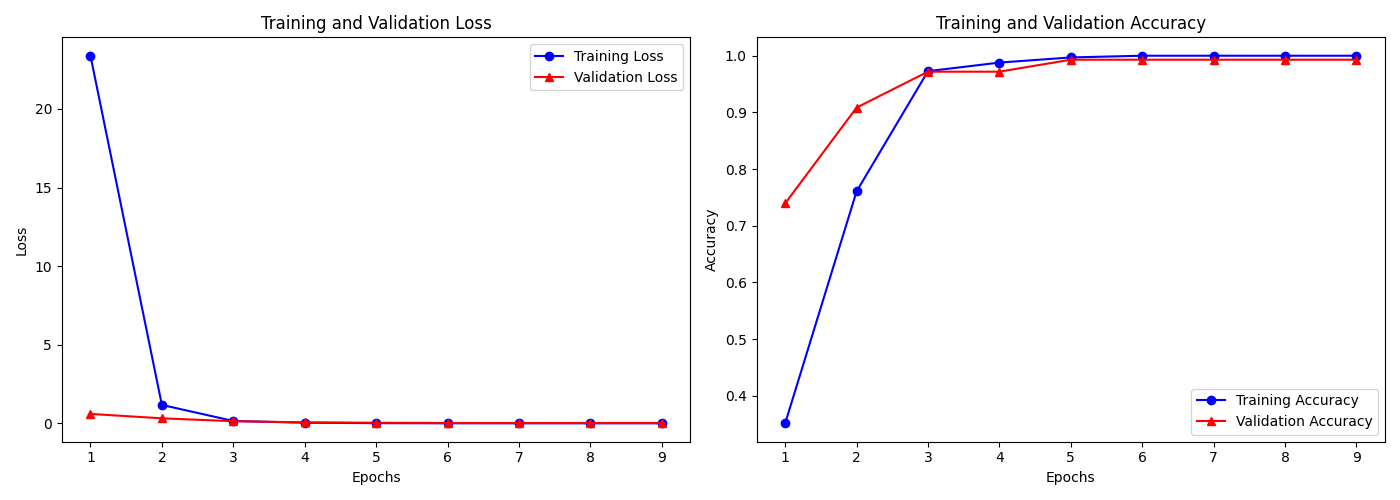

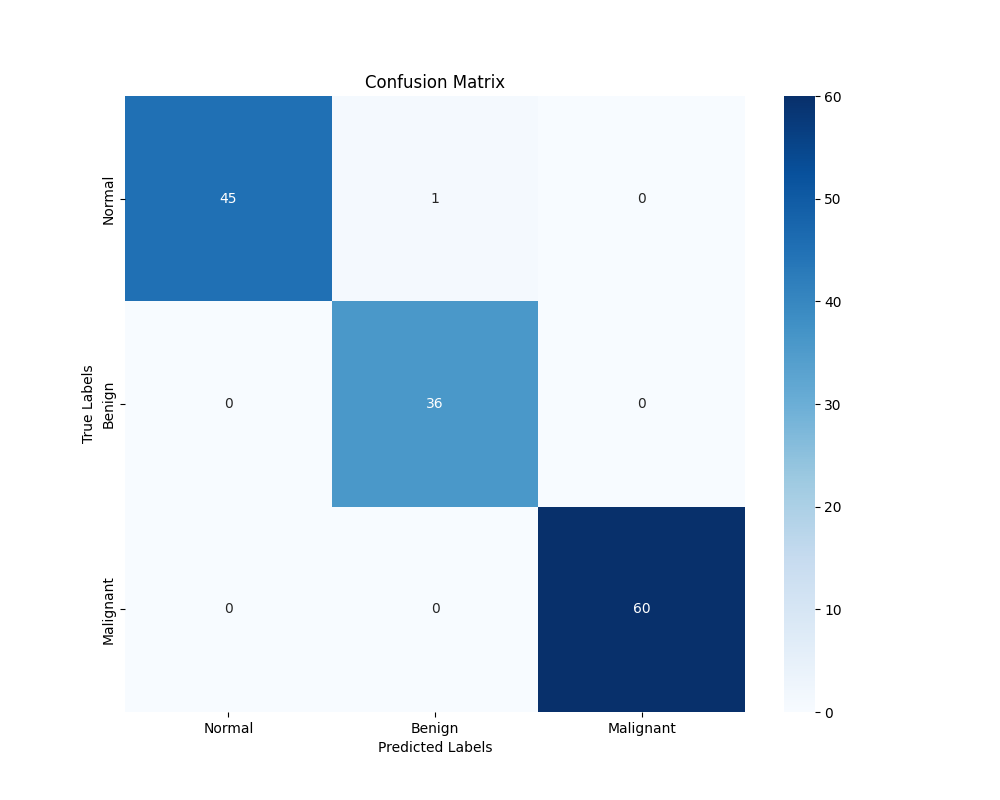

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        60

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



In [61]:

for modelo in Dados_Modelos.keys():
    print('\n\n')
    modelo_l = Dados_Modelos[modelo]
    
    print(modelo_l)
    print(modelo)
    print('Descrição:\n',modelo_l[0])
    #plot_model(modelo_l[1], to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    #display(Image(filename='model_plot.png'))
    modelo_l[1].summary()
    lines_history=''
    i=0
    while i< len(modelo_l[4].history['accuracy']):
        line='Epoch: '+str(i+1)+'\n'
        for key in modelo_l[4].history.keys():
            line =line+ str(key)+': '+ str(modelo_l[4].history[key][i]) + '; '
        i=i+1
        lines_history=lines_history+line+'\n\n'

    print('History:\n',lines_history)
    print('Test Accuracy:\n',modelo_l[5])

    im = Image.open(modelo_l[6])
    display(im)

    im = Image.open(modelo_l[7])
    display(im)
    print(modelo_l[-1])